# **E-Commerce Customer Churn** 

**List of Content**
1. Business Problem Understanding
1. Data Understanding
1. Data Preprocessing
1. Modelling
1. Conclusion
1. Recommendation

***
# ***Business Problem Understanding & Data Understanding***

**Bussiness Context**


E-Commerce merupakan salah satu bentuk perkembangan teknologi dalam bidang ekonomi yang meliputi proses promosi, pembelian dan pemasaran produk melalui media elektronik atau internet. Di tengah perkembangan arus teknologi dan informasi digital yang semakin canggih. Aktivitas E-Commerce adalah suatu penerapan dari E-Business atau bisnis elektronik yang cukup efektif, sehingga platform eCommerce semakin banyak dan persaingan semakin ketat. 
Sebuah perusahaan eCommerce sebut saja **"Black E-Commerce"** menjalankan sebuah bisnis online retail dengan model B2C (Business to Consumer) dengan produk-produk yang ditawarkan seperti Laptop & Accesories, Mobile Phone, Fashion, Groceries, dan lainnya.  Perusahaan eCommerce saat ini berlomba-lomba berinovasi dalam menawarkan produk yang menarik kepada pelanggan. Bahkan, perusahaan saling mengakuisisi pelanggan antar perusahaan eCommerce satu sama lain. Sehingga pelanggan berhenti bertransaksi menggunakan platform perusahan eCommerce dan berpindah menggunakan platform eCommerce lainnya sangat mungkin terjadi. Perilaku pelanggan tersebut disebut dengan
istilah ***Churn***. Pelanggan adalah salah satu aset terpenting perusahaan dan memiliki peran yang sangat penting dalam meningkatkan daya saing pasar dan kinerja perusahaan. Melansir dari halaman web <a href="https://www.europeanbusinessreview.com/is-acquiring-new-customers-more-expensive-than-keeping-them/">Europian Business Review</a>, Penelitian menunjukkan bahwa biaya untuk mendapatkan pelanggan baru seringkali lebih tinggi (5 kali lebih mahal) daripada biaya mempertahankan pelanggan lama. Perusahaan akan mengalami kerugian yang cukup signifikan apabila terdapat pelanggan yang melakukan *Churn*.

**Problem Statement**

*Customer Churn* merupakan salah satu masalah yang harus dihadapi setiap bisnis eCommerce karena pada dasarnya pelanggan selalu datang dan pergi. Tetapi jika *Churn* dibiarkan, hal itu dapat berdampak besar pada pendapatan dalam jangka panjang. Karena pasar eCommerce tumbuh lebih kompetitif, selama bertahun-tahun menjalankan bisnis, biaya akuisisi pelanggan naik karena perlu menghabiskan lebih banyak untuk iklan digital dan pemasaran agar tetap terlihat. Jika perusahaan tidak dapat mempertahankan pelanggan setelah investasi awal, maka keuntungan akan menurun secara signifikan. Ditambah lagi jika ada pelanggan yang melakukan *Churn* karena kecewa, kemungkinan mereka akan bercerita kepada orang lain sehingga mempengaruhi orang lain untuk tidak menggunakan platform eCommerce perusahaan kita. 

**Goals**

Berdasarkan permasalahan tersebut, mengurangi *customer churn* merupakan tujuan bisnis utama perusahaan. Perusahaan ini ingin memiliki kemampuan untuk memprediksi kemungkinan pelanggan yang akan melakukan churn/tidak, serta mengetahui faktor/variabel apa yang dapat mempengaruhi pelanggan berhenti(churn)/tidak. Sehingga perusahaan dapat membuat perencanaan penawaran yang lebih sesuai kepada pelanggan yang berpotensi melakukan chun untuk mempertahankan pelanggan.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan pelanggan yang cenderung akan melakukan churn dan yang tidak. 

Selanjutnya, kita akan membangun suatu model klasifikasi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi pelanggan yang kemungkinan akan churn atau tidak.

**Evaluation Metrics**

- **Type I error (False Positive)** mengacu pada pelanggan yang diprediksi akan berhenti tetapi berencana untuk tetap loyal. <br> <br>
Konsekuensi : *Jika kita mengasumsikan eCommerce berinvestasi dalam mempertahankan pelanggan yang berisiko untuk churn, seperti menawarkan produk baru dengan harga spesial, meningkatkan jumlah cashback, dll,* **Maka adanya potensi biaya pengeluaran yang sia - sia untuk Tipe I error ini karena biaya investasi diberikan kepada pelanggan yang tidak berencana untuk Churn**

- **Type II error (False Negative)** mengacu pada pelanggan yang akan melakukan *Churn* tetapi diprediksi tetap loyal/tidak churn. <br> <br> 
*Konsekuensi : Dengan asumsi eCommerce hanya memfokuskan investasinya dalam mempertahankan pelanggan yang berisiko agar tidak Churn dan terus memberikan penawaran yang sama kepada pelanggan setia lain, sehingga ***Tipe II Error ini adalah kehilangan pelanggan***. Perusahaan akan sangat merugi karena biaya untuk mendapatkan pelanggan baru diperkirakan lebih tinggi dibandingkan dengan mempertahankan pelanggan saat ini.*

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat **mengurangi jumlah kehilangan pelanggan** dari perusahaan tersebut, dan mengurangi biaya investasi yang sia-sia dalam mempertahankan pelanggan yang diprediksi akan *Churn* namun kenyataannya pelanggan tidak akan *Churn*. Jadi harus kita seimbangkan antara precision dan recallnya dari kelas positive (Customer churn). Jadi nanti metric yang akan kita gunakan adalah **roc_auc**, karena jika diperhatikan dataset yang dimiliki memiliki imbalanced data.

***
## ***Data Understanding***

Note :
- Dataset ini hanyalah data *training* yang digunakan untuk membangun model dan akan diusahakan agar model memiliki skor evaluation metrics setinggi mungkin. 
- Setiap baris data mempresentasikan informasi riwayat transaksi seorang pelanggan di masa lalu

### Attibute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Tenure | Float | Tenure of customer in ecommerce company |
| WarehouseToHome | Float | Distance in between warehouse to home of customer |
| NumberOfDeviceRegistered | Integer | Total number of devices is registered on particular customer |
| PreferedOrderCat | Text | Preferred order category of customer in last month |
| SatisfactionScore | Integer | Satisfactory score of customer on service |
| MaritalStatus | Text | Marital status of customer |
| NumberOfAddress | Integer | Total number of added added on particular customer |
| Complain | Integer | Any complaint has been raised in last month |
| DaySinceLastOrder | Float | Day Since last order by customer |
| CashbackAmount | Float | Average cashback in last month |
| Churn | Integer | 0 - Not Churn, 1 - Churn|

***
## ***Import Library***

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()

# Statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import category_encoders as ce

# Feature Engineering
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer


# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC

import pickle
import shap

# Ignore Warnings
import sys
import warnings
warnings.filterwarnings('ignore')
if not sys.warnoptions:
    warnings.simplefilter('ignore')

# Set max columns
pd.set_option('display.max_columns', None)
from sklearn.compose import ColumnTransformer

In [ ]:
import lightgbm 

***
# **Data Preparation and Cleaning**


***

#### **Load Dataset**

In [ ]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0    15.0             29.0                         4  Laptop & Accessory   
1     7.0             25.0                         4              Mobile   
2    27.0             13.0                         3  Laptop & Accessory   
3    20.0             25.0                         4             Fashion   
4    30.0             15.0                         4              Others   

   SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
0                  3        Single                2         0   
1                  1       Married                2         0   
2                  1       Married                5         0   
3                  3      Divorced                7         0   
4                  4        Single                8         0   

   DaySinceLastOrder  CashbackAmount  Churn  
0                7.0          143.32      0  
1                7.0          129.29      0  
2                7.0          168.54      0  
3                NaN          230.27      0  
4                8.0          322.17      0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [ ]:
# Checking for duplicate data

df[df.duplicated()]

Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
70       1.0             11.0                         4        Mobile Phone   
128      1.0             10.0                         4        Mobile Phone   
194     18.0             26.0                         3  Laptop & Accessory   
253     19.0              6.0                         3             Fashion   
289     16.0             36.0                         4  Laptop & Accessory   
...      ...              ...                       ...                 ...   
3930    22.0             17.0                         3  Laptop & Accessory   
3932    20.0             15.0                         5  Laptop & Accessory   
3934    10.0             25.0                         3  Laptop & Accessory   
3938    30.0              6.0                         5  Laptop & Accessory   
3939     6.0              NaN                         4              Mobile   

      SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
70                    5        Single                3         0   
128                   1        Single                3         1   
194                   3        Single                9         0   
253                   5       Married                2         0   
289                   3       Married                4         0   
...                 ...           ...              ...       ...   
3930                  1        Single                4         0   
3932                  5       Married               10         1   
3934                  3       Married                4         0   
3938                  3       Married                3         1   
3939                  3       Married               10         1   

      DaySinceLastOrder  CashbackAmount  Churn  
70                  1.0          154.73      1  
128                 1.0          140.69      1  
194                 1.0          148.50      0  
253                 7.0          204.53      0  
289                 3.0          170.56      0  
...                 ...             ...    ...  
3930                4.0          145.07      0  
3932                8.0          171.15      0  
3934                2.0          157.68      0  
3938                2.0          156.60      0  
3939                0.0          124.37      1  

[671 rows x 11 columns]

> *Karena tidak ada uniqueID seperti CustomerID, jadi kita tidak menganggap hasil diatas sebagai data duplikat karena setiap baris bisa saja mewakili transaksi pelanggan yang berbeda*
>

#### **Data Information**

In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique()]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'missingValue', 'missingValue_Pct', 'uniqueValue'],
                     data=listItem)
dfDesc

dataFeatures dataType  missingValue  missingValue_Pct  \
0                     Tenure  float64           194              4.92   
1            WarehouseToHome  float64           169              4.29   
2   NumberOfDeviceRegistered    int64             0              0.00   
3           PreferedOrderCat   object             0              0.00   
4          SatisfactionScore    int64             0              0.00   
5              MaritalStatus   object             0              0.00   
6            NumberOfAddress    int64             0              0.00   
7                   Complain    int64             0              0.00   
8          DaySinceLastOrder  float64           213              5.40   
9             CashbackAmount  float64             0              0.00   
10                     Churn    int64             0              0.00   

    uniqueValue  
0            36  
1            33  
2             6  
3             6  
4             5  
5             3  
6            14  
7             2  
8            22  
9          2335  
10            2

> Terdapat beberapa variabel yang memiliki missing value, diantaranya :
> - Tenure (4.92 %)
> - WarehouseToHome (4.29 %)
> - DaySinceLastOrder (5.4 %) 
> Kebanyakan dari variabel ini adalah variabel continous. Kita perlu melakukan penanagan pada missing value ini agar dataset siap digunakan dalam model machine learning

##### **Checking Variable Types (Categorical, Numerical)**

##### *Categorical Variables*

In [ ]:
# Identifying categorical variables
cat_vars = [var for var in df.columns if df[var].dtype == 'O']

print(f'There are {len(cat_vars)} categorical features:\n{cat_vars}')

There are 2 categorical features:
['PreferedOrderCat', 'MaritalStatus']


##### *Numerical Variables*

In [ ]:
# Identifying numerical variables
num_vars = [var for var in df.columns if df[var].dtype != 'O' and var !='Churn']
cont_vars = [var for var in num_vars if df[var].nunique() > 14]
dis_vars = [var for var in num_vars if df[var].nunique() < 14]

print(f'There are {len(num_vars)} numerical features:\n{num_vars}')

print(f'\nContinous Variables:\n{cont_vars}')
print(f'\nDiscrete Variables:\n{dis_vars}')

There are 8 numerical features:
['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']

Continous Variables:
['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

Discrete Variables:
['NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain']


#### **Checking & Handling Missing Value** <br>
Sebelum melakukan penanganan missing value, kita perlu menelusuri lebih detail terkait tipe missing value yang terdapat dalam data kita.

Dalam prosedur statistika modern, untuk data hilang, ketidaklengkapan suatu data di asumsikan mengikuti suatu mekanisme tertentu, Menurut **Rubin(1976)** tipe data hilang terbagi kedalam tiga tipe, yaitu :

- **Missing at Random (MAR)** jika mekanisme data hilang terdistribusi secara acak untuk sebagian unit observasi. Dengan kata lain, Missing at Random (MAR), berarti terjadinya missing data hanya berkaitan dengan variabel respon/pengamatan. Contohnya seseorang yang memiliki rasa waswas yang tinggi cenderung tidak akan melaporkan pendapatan mereka, rasa waswas akan berhubungan pada pelaporan pendapatan. Namun, peluang penderita rasa waswas sendiri untuk melaporkan pendapatan tidak berhubungan dengan tingkat pendapatan, maka data dapat digolongkan dengan MAR. Jika data adalah MCAR atau MAR, dapat dikatakan missingness diabaikan.

- **Missing completely at random (MCAR)** jika mekanisme data hilang yang terdistribusi secara acak untuk seluruh unit observasi. Dengak kata lain, Missing Completely at Random (MCAR) yang berarti bahwa terjadinya missing data tidak berkaitan dengan nilai semua variabel, apakah itu variabel dengan missing values atau dengan variabel pengamatan. Hal ini berarti missing data terjadi secara acak.

- **Missing Not at Random (MNAR)** mekanisme data hilang yang tidak terdistribusi secara random. Dengan kata lain, *Missingness Is Non-Ignorable* bahwa terjadinya missing data pada suatu variabel berkaitan dengan variabel itu sendiri, sehingga ini tidak bisa diprediksi dari variabel lain pada suatu dataset.

##### *Exploring Missing Value*

In [ ]:
# Identifying numerical variables with missing value
mis_vars = [var for var in num_vars if df[var].isna().sum() >= 1]
print(f'There are {len(mis_vars)} numerical features which contained the missing value:\n{mis_vars} ')

There are 3 numerical features which contained the missing value:
['Tenure', 'WarehouseToHome', 'DaySinceLastOrder'] 


**Tenure**

In [ ]:
df[(df['Tenure'].isna() == True)].describe()

Tenure  WarehouseToHome  NumberOfDeviceRegistered  SatisfactionScore  \
count     0.0       194.000000                 194.00000         194.000000   
mean      NaN        14.556701                   3.28866           3.180412   
std       NaN         7.714422                   0.80102           1.284998   
min       NaN         6.000000                   1.00000           1.000000   
25%       NaN         8.000000                   3.00000           3.000000   
50%       NaN        13.000000                   3.00000           3.000000   
75%       NaN        19.000000                   4.00000           4.000000   
max       NaN        34.000000                   5.00000           5.000000   

       NumberOfAddress    Complain  DaySinceLastOrder  CashbackAmount  \
count       194.000000  194.000000         194.000000      194.000000   
mean          3.144330    0.257732           2.025773      120.363660   
std           2.332424    0.438517           2.328992        2.737009   
min           1.000000    0.000000           0.000000      112.000000   
25%           2.000000    0.000000           0.000000      120.220000   
50%           2.000000    0.000000           2.000000      121.070000   
75%           4.000000    1.000000           3.000000      122.175000   
max          19.000000    1.000000          13.000000      123.130000   

            Churn  
count  194.000000  
mean     0.329897  
std      0.471392  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [ ]:
# Menampilkan semua row data customer yang memiliki CashbackAmount dalam range $112 - $123.13
df[(df['CashbackAmount'] >= 112) & (df['CashbackAmount'] <= 123.13)][['Tenure', 'CashbackAmount']]

Tenure  CashbackAmount
16       NaN          121.68
37       NaN          122.18
44       NaN          120.08
85       NaN          122.70
93       NaN          120.75
...      ...             ...
3842     NaN          122.59
3853     NaN          116.75
3879     NaN          122.97
3890     NaN          114.20
3925     NaN          120.44

[196 rows x 2 columns]

In [ ]:
df[(df['Tenure'].isna() == True)]['MaritalStatus'].value_counts()

Married     93
Single      70
Divorced    31
Name: MaritalStatus, dtype: int64

**WarehouseToHome**

In [ ]:
df[df['WarehouseToHome'].isna() == True].describe()

Tenure  WarehouseToHome  NumberOfDeviceRegistered  \
count  169.000000              0.0                169.000000   
mean     6.337278              NaN                  3.201183   
std      7.480043              NaN                  0.849229   
min      0.000000              NaN                  1.000000   
25%      0.000000              NaN                  3.000000   
50%      4.000000              NaN                  3.000000   
75%     11.000000              NaN                  4.000000   
max     30.000000              NaN                  5.000000   

       SatisfactionScore  NumberOfAddress    Complain  DaySinceLastOrder  \
count          169.00000       169.000000  169.000000         169.000000   
mean             3.08284         3.514793    0.301775           2.461538   
std              1.44922         2.526306    0.460392           2.712405   
min              1.00000         1.000000    0.000000           0.000000   
25%              2.00000         2.000000    0.000000           0.000000   
50%              3.00000         2.000000    0.000000           2.000000   
75%              4.00000         5.000000    1.000000           3.000000   
max              5.00000        10.000000    1.000000          15.000000   

       CashbackAmount       Churn  
count      169.000000  169.000000  
mean       124.584793    0.355030  
std          0.987585    0.479944  
min        123.180000    0.000000  
25%        123.720000    0.000000  
50%        124.390000    0.000000  
75%        125.590000    1.000000  
max        126.570000    1.000000

In [ ]:
df[(df['WarehouseToHome'].isna() == False) & (df['CashbackAmount'] >= 123.18) & (df['CashbackAmount'] <= 126.57)]

Empty DataFrame
Columns: [Tenure, WarehouseToHome, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, DaySinceLastOrder, CashbackAmount, Churn]
Index: []

In [ ]:
df[df['WarehouseToHome'].isna() == True]['MaritalStatus'].value_counts()

Married     74
Single      70
Divorced    25
Name: MaritalStatus, dtype: int64

**DaySinceLastOrder**

In [ ]:
df[df['DaySinceLastOrder'].isna() == True].describe()

Tenure  WarehouseToHome  NumberOfDeviceRegistered  \
count  213.000000       213.000000                213.000000   
mean    11.530516        15.647887                  4.103286   
std      8.281330         8.079963                  0.894764   
min      0.000000         6.000000                  1.000000   
25%      5.000000         9.000000                  4.000000   
50%     10.000000        14.000000                  4.000000   
75%     17.000000        19.000000                  5.000000   
max     31.000000        36.000000                  6.000000   

       SatisfactionScore  NumberOfAddress    Complain  DaySinceLastOrder  \
count         213.000000       213.000000  213.000000                0.0   
mean            2.915493         4.877934    0.272300                NaN   
std             1.418342         2.606981    0.446192                NaN   
min             1.000000         1.000000    0.000000                NaN   
25%             2.000000         3.000000    0.000000                NaN   
50%             3.000000         4.000000    0.000000                NaN   
75%             4.000000         6.000000    1.000000                NaN   
max             5.000000        11.000000    1.000000                NaN   

       CashbackAmount       Churn  
count      213.000000  213.000000  
mean       220.923052    0.187793  
std          6.621594    0.391467  
min        209.340000    0.000000  
25%        214.980000    0.000000  
50%        221.690000    0.000000  
75%        227.090000    0.000000  
max        231.420000    1.000000

In [ ]:
df[(df['CashbackAmount'] >= 209.34) & (df['CashbackAmount'] <= 231.42)][['DaySinceLastOrder', 'CashbackAmount']]

DaySinceLastOrder  CashbackAmount
3                   NaN          230.27
10                  NaN          221.10
13                  NaN          231.09
29                  NaN          228.06
52                  NaN          226.24
...                 ...             ...
3836                NaN          230.02
3843                NaN          221.13
3892                NaN          218.96
3894                NaN          214.66
3904                NaN          219.96

[214 rows x 2 columns]

In [ ]:
df[df['DaySinceLastOrder'].isna() == True]['MaritalStatus'].value_counts()

Married     121
Single       62
Divorced     30
Name: MaritalStatus, dtype: int64

***
**Observation :**
* *Missing value yang terdapat pada variabel ``WarehouseToHome`` dapat dikatakan sebagai missing value dengan kategori **Missing Not At Random (MNAR)** karena missing value hanya terdapat ketika customer mendapatkan CashbackAmount dalam range $123.18 - $126.57*.
* *Pada variabel `Tenure`, missing value yang ditemukan juga termasuk kategori **Missing Not At Random (MNAR)** karena missing value Tenure hanya terdapat pada customer yang mendapatkan CashbackAmount dalam range $112 - $123.13*
* *Jika diperhatikan juga pada variabel ``DaySinceLastOrder``, ditemukan missing value yang termasuk dalam kategori **Missing Not At Random (MNAR)**, dimana missing value hanya terdapat pada data customer yang mendapatkan Cashback Amount dalam range 209.34 - 231.42*
* Secara Urutan semua variabel yang memilki missing value memiliki proporsi yang lebih banyak pada customer yang berstatus Married, jika dibandingkan dengan customer yang memiliki status Single dan Divorce dan semua variabel tersebut memiliki proporsi dengan urutan yang sama (Married > Single > Divorced)

Berdasarkan hasil observasi tersebut, selanjutnya akan dilakukan treatment terhadap missing value dengan menambahkan binary flags untuk missing value (*Add binary Flags for missing value*). Bersumber dari *machinelearningmastery*, dengan menambahkan binary flags untuk missing value dapat meningkatkan performa model. Selanjutnya, akan dicoba penanganan missing value dengan melakukan imputasi menggunakan nilai median setiap variabel berdasarkan kategori `MaritalStatus`.

**Reference :**
- https://towardsdatascience.com/missing-value-handling-missing-data-types-a89c0d81a5bb
- https://towardsdatascience.com/missing-values-dont-drop-them-f01b1d8ff557
- https://machinelearningmastery.com/binary-flags-for-missing-values-for-machine-learning/ 
- https://www.topbots.com/handling-missing-data-for-machine-learning/
***



##### *Handling missing value*

In [ ]:
# Gathering all variables containing missing values
num_with_nan = [var for var in num_vars if df[var].isnull().sum() > 0]
num_with_nan

['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

**Handling Missing Value Function**

In [ ]:
def handlingMissingValue(data):
    for var in num_with_nan:
        # add binary missing indicator 
        data[var + '_na'] = np.where(data[var].isnull(), 1, 0)

    data['Tenure'] = data['Tenure'].fillna(data.groupby(['MaritalStatus'])['Tenure'].transform('median'))
    data['WarehouseToHome'] = data['WarehouseToHome'].fillna(data.groupby(['MaritalStatus'])['WarehouseToHome'].transform('median'))
    data['DaySinceLastOrder'] = data['DaySinceLastOrder'].fillna(data.groupby(['MaritalStatus'])['DaySinceLastOrder'].transform('median'))
    return data

Before Handling Missing Value

In [ ]:
df.describe()

Tenure  WarehouseToHome  NumberOfDeviceRegistered  \
count  3747.000000      3772.000000               3941.000000   
mean     10.081398        15.650583                  3.679269   
std       8.498864         8.452301                  1.013938   
min       0.000000         5.000000                  1.000000   
25%       2.000000         9.000000                  3.000000   
50%       9.000000        14.000000                  4.000000   
75%      16.000000        21.000000                  4.000000   
max      61.000000       127.000000                  6.000000   

       SatisfactionScore  NumberOfAddress     Complain  DaySinceLastOrder  \
count        3941.000000      3941.000000  3941.000000        3728.000000   
mean            3.088302         4.237757     0.282416           4.531652   
std             1.381832         2.626699     0.450232           3.667648   
min             1.000000         1.000000     0.000000           0.000000   
25%             2.000000         2.000000     0.000000           2.000000   
50%             3.000000         3.000000     0.000000           3.000000   
75%             4.000000         6.000000     1.000000           7.000000   
max             5.000000        22.000000     1.000000          46.000000   

       CashbackAmount        Churn  
count     3941.000000  3941.000000  
mean       176.707419     0.171023  
std         48.791784     0.376576  
min          0.000000     0.000000  
25%        145.700000     0.000000  
50%        163.340000     0.000000  
75%        195.250000     0.000000  
max        324.990000     1.000000

After Handling Missing Value

In [ ]:
df_clean = df.copy()
df_clean = handlingMissingValue(df_clean)
df_clean.describe()

Tenure  WarehouseToHome  NumberOfDeviceRegistered  \
count  3941.000000      3941.000000               3941.000000   
mean     10.008374        15.555697                  3.679269   
std       8.298901         8.281823                  1.013938   
min       0.000000         5.000000                  1.000000   
25%       3.000000         9.000000                  3.000000   
50%       9.000000        14.000000                  4.000000   
75%      15.000000        20.000000                  4.000000   
max      61.000000       127.000000                  6.000000   

       SatisfactionScore  NumberOfAddress     Complain  DaySinceLastOrder  \
count        3941.000000      3941.000000  3941.000000        3941.000000   
mean            3.088302         4.237757     0.282416           4.448871   
std             1.381832         2.626699     0.450232           3.583909   
min             1.000000         1.000000     0.000000           0.000000   
25%             2.000000         2.000000     0.000000           2.000000   
50%             3.000000         3.000000     0.000000           3.000000   
75%             4.000000         6.000000     1.000000           7.000000   
max             5.000000        22.000000     1.000000          46.000000   

       CashbackAmount        Churn    Tenure_na  WarehouseToHome_na  \
count     3941.000000  3941.000000  3941.000000         3941.000000   
mean       176.707419     0.171023     0.049226            0.042883   
std         48.791784     0.376576     0.216367            0.202618   
min          0.000000     0.000000     0.000000            0.000000   
25%        145.700000     0.000000     0.000000            0.000000   
50%        163.340000     0.000000     0.000000            0.000000   
75%        195.250000     0.000000     0.000000            0.000000   
max        324.990000     1.000000     1.000000            1.000000   

       DaySinceLastOrder_na  
count           3941.000000  
mean               0.054047  
std                0.226139  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.000000

In [ ]:
# Total number of missing values per column
df_clean.isnull().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
Tenure_na                   0
WarehouseToHome_na          0
DaySinceLastOrder_na        0
dtype: int64

***
**Result :**
* Terdapat perubahan nilai mean dan median pada variable yang dilakukan imputasi missing value, dimana selisih antara mean dan mediannya semakin kecil.

***

#### **Checking & Handling Outliers**

In [ ]:
# Function Boxplot Visualization
def boxplot(data, vars):
    text = 'Box Plot of ' + str(vars)
    fig = go.Figure()

    for column in data[vars]:
        fig.add_trace(go.Box(x=data[column].values, name=data[column].name))

    fig.update_layout(
        title={
            'text': text,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
    return fig.show()

**Data Distribution**

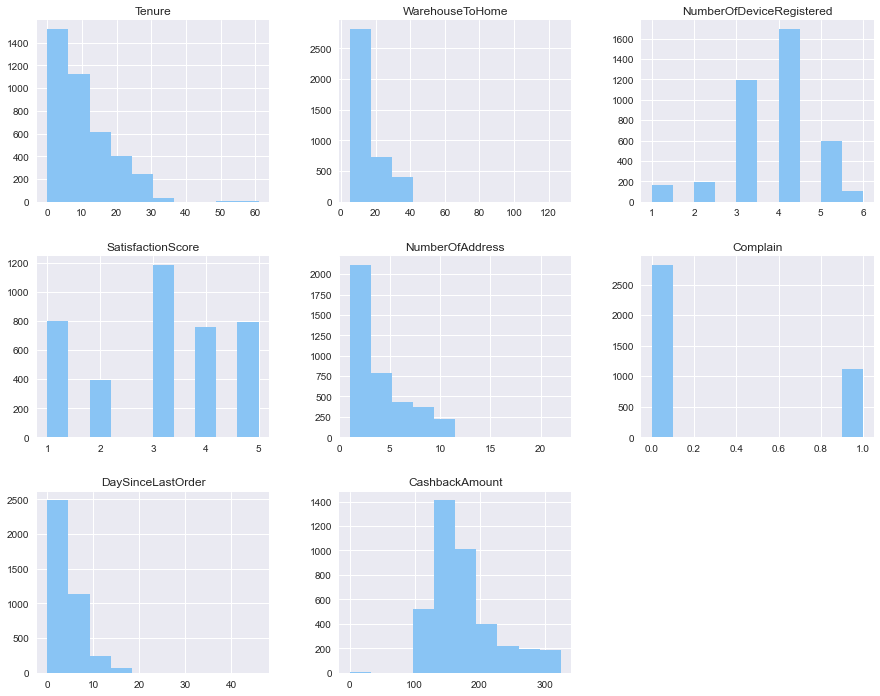

In [ ]:
plt.style.use('seaborn')
df_clean[num_vars].hist(figsize = (15,12), color='#89C4F4')
plt.show()

In [ ]:
for var in num_vars:
    print(f'Skewness of {var}', skew(df_clean[var]))

Skewness of Tenure 0.8313156573951546
Skewness of WarehouseToHome 1.4865105803854026
Skewness of NumberOfDeviceRegistered -0.40971841651026203
Skewness of SatisfactionScore -0.16370877285834523
Skewness of NumberOfAddress 1.0864282858522851
Skewness of Complain 0.966666881392084
Skewness of DaySinceLastOrder 1.420380056489132
Skewness of CashbackAmount 1.1427590875420313


In [ ]:
list_boxplot = [cont_vars, dis_vars]
for i in list_boxplot:
    boxplot(df_clean, i)

**IQR (Interquantile Range)**

In [ ]:
# Handling with IQR
Q1 = (df_clean[num_vars]).quantile(0.25)
Q3 = (df_clean[num_vars]).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
print('Maximum value from each variables are: ')
print(maximum)

minimum = Q1 - (1.5*IQR)
print('\nMinimum value from each variables are: ')
print(minimum)

more_than = (df_clean > maximum)
lower_than = (df_clean < minimum)

Maximum value from each variables are: 
Tenure                       33.000
WarehouseToHome              36.500
NumberOfDeviceRegistered      5.500
SatisfactionScore             7.000
NumberOfAddress              12.000
Complain                      2.500
DaySinceLastOrder            14.500
CashbackAmount              269.575
dtype: float64

Minimum value from each variables are: 
Tenure                     -15.000
WarehouseToHome             -7.500
NumberOfDeviceRegistered     1.500
SatisfactionScore           -1.000
NumberOfAddress             -4.000
Complain                    -1.500
DaySinceLastOrder           -5.500
CashbackAmount              71.375
dtype: float64


In [ ]:
df_clean[(df_clean['CashbackAmount'] < 71.375) | (df_clean['CashbackAmount'] > 269.575)].describe()

Tenure  WarehouseToHome  NumberOfDeviceRegistered  \
count  316.000000       316.000000                316.000000   
mean    19.601266        14.446203                  3.696203   
std      7.494709         8.222325                  0.895909   
min      0.000000         5.000000                  1.000000   
25%     15.000000         8.000000                  3.000000   
50%     20.000000        11.000000                  4.000000   
75%     24.000000        19.250000                  4.000000   
max     61.000000        36.000000                  6.000000   

       SatisfactionScore  NumberOfAddress    Complain  DaySinceLastOrder  \
count         316.000000       316.000000  316.000000         316.000000   
mean            3.085443         4.775316    0.237342           6.797468   
std             1.362413         2.561651    0.426128           4.530334   
min             1.000000         1.000000    0.000000           0.000000   
25%             2.000000         3.000000    0.000000           3.000000   
50%             3.000000         4.000000    0.000000           7.000000   
75%             4.000000         6.000000    0.000000          10.000000   
max             5.000000        11.000000    1.000000          18.000000   

       CashbackAmount       Churn  Tenure_na  WarehouseToHome_na  \
count      316.000000  316.000000      316.0               316.0   
mean       288.986203    0.037975        0.0                 0.0   
std         48.529004    0.191438        0.0                 0.0   
min          0.000000    0.000000        0.0                 0.0   
25%        286.240000    0.000000        0.0                 0.0   
50%        294.335000    0.000000        0.0                 0.0   
75%        306.790000    0.000000        0.0                 0.0   
max        324.990000    1.000000        0.0                 0.0   

       DaySinceLastOrder_na  
count                 316.0  
mean                    0.0  
std                     0.0  
min                     0.0  
25%                     0.0  
50%                     0.0  
75%                     0.0  
max                     0.0

***
**Observation :**

- Jika diperhatikan, Variable `CashbackAmount` memiliki cukup banyak Outliers atau data pencilan, dan beberapa variabel lainnya jg  memiliki outliers diantaranya variabel `DaySinceLastOrder`, `Tenure`, `NumberOfDeviceRegistered`. Selanjutnya akan dilakukan analisis terhadap outliers-outliers variabel ini terhadap target agar diperoleh metode yang paling sesuai untuk menangani outliers pada variabel-variabel ini.
- Selain itu, jika diperhatikan Variabel `WarehouseToHome` hanya memiliki 1 data outliers, sehingga untuk menghandle data outliers pada variabel ini dapat dilakukan dengan menghapus data outliers.

***

##### *Exploring Variable which contain Outliers*

***WarehouseToHome***

correlation:  0.06795044690555939


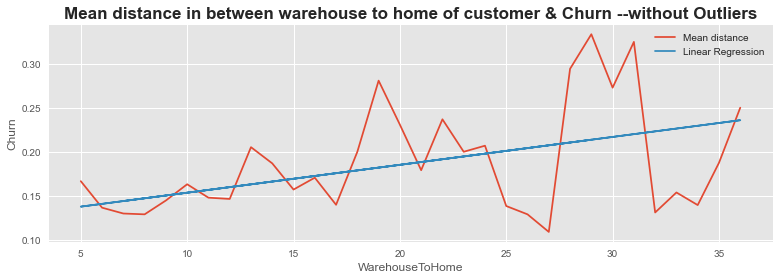

In [ ]:
# Temporarly removing the one outliers
temp = df_clean[df_clean['WarehouseToHome'] < 36.5]

# Plotting relationship with Churn
plt.style.use('ggplot')
plt.figure(figsize = (13,4))
plt.title('Mean distance in between warehouse to home of customer & Churn --without Outliers', weight = 'bold', size = 17)
temp.groupby('WarehouseToHome')['Churn'].mean().plot(label = 'Mean distance')
print('correlation: ', temp.Churn.corr(temp['WarehouseToHome']))
plt.ylabel('Churn')
plt.yticks(np.arange(0,0.5,0.05))

# adding linear regression line
y = temp.Churn
x = temp['WarehouseToHome']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, label = 'Linear Regression')
plt.legend()
plt.show()

correlation:  0.06481700132868011


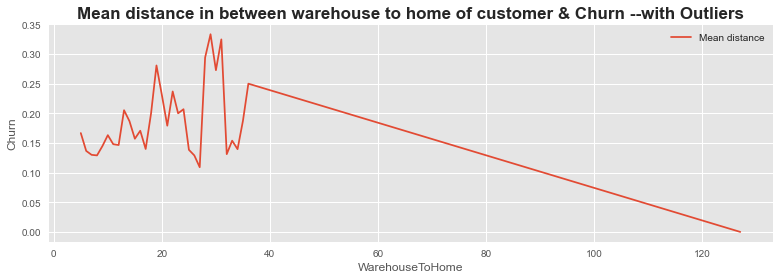

In [ ]:
# Plotting relationship with Churn when outliers are not excluded
plt.figure(figsize = (13,4))
plt.title('Mean distance in between warehouse to home of customer & Churn --with Outliers', weight = 'bold', size = 17)
df_clean.groupby('WarehouseToHome')['Churn'].mean().plot(label = 'Mean distance')
print('correlation: ', df_clean['Churn'].corr(df_clean['WarehouseToHome']))
plt.ylabel('Churn')
plt.yticks(np.arange(0,0.4,0.05))
plt.legend()
plt.show()

> Dapat dilihat, ada satu outlier dalam fitur WarehouseToHome yang dapat merusak kinerja model karena tidak sesuai dengan korelasi positif yang diharapkan antara variabel WarehouseToHome dan Churn. Selain itu, kita jg dapat melihat bahwa korelasi antara WarehouseToHome dan Churn sedikit berbeda tanpa outlier ini. <br> <br>
Oleh karena itu, kita dapat itu menghapus oulier ini atau mengubahnya nilainya menjadi lebih dekat dengan distribusi rata-rata. Untuk menghindari kehilangan data, opsi kedua tampaknya lebih tepat untuk kasus ini.

***DaySinceLastOrder***

correlation:  -0.1626201695283154


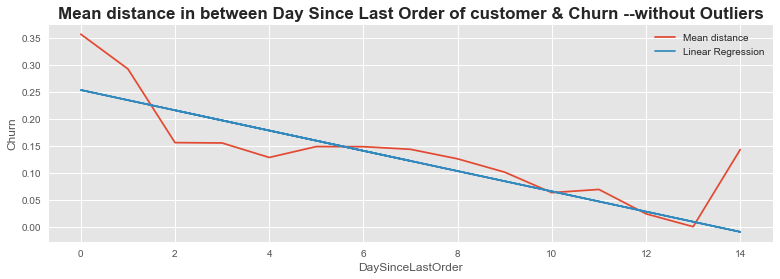

In [ ]:
# Temporarly removing the one outliers
temp = df_clean[df_clean['DaySinceLastOrder'] <= 14.5]

# Plotting relationship with Churn
plt.style.use('ggplot')
plt.figure(figsize = (13,4))
plt.title('Mean distance in between Day Since Last Order of customer & Churn --without Outliers', weight = 'bold', size = 17)
temp.groupby('DaySinceLastOrder')['Churn'].mean().plot(label = 'Mean distance')
print('correlation: ', temp.Churn.corr(temp['DaySinceLastOrder']))
plt.ylabel('Churn')
plt.yticks(np.arange(0,0.5,0.05))

# adding linear regression line
y = temp.Churn
x = temp['DaySinceLastOrder']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, label = 'Linear Regression')
plt.legend()
plt.show()

correlation:  -0.16044592058268467


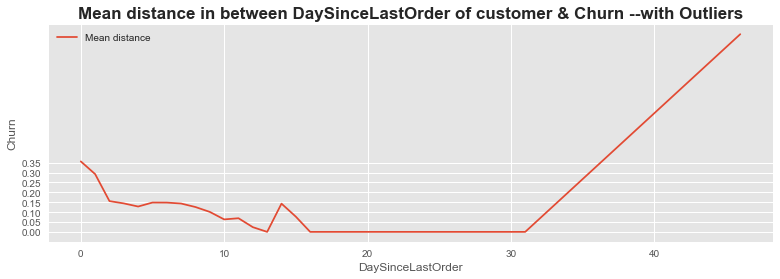

In [ ]:
# Plotting relationship with Churn when outliers are not excluded
plt.figure(figsize = (13,4))
plt.title('Mean distance in between DaySinceLastOrder of customer & Churn --with Outliers', weight = 'bold', size = 17)
df.groupby('DaySinceLastOrder')['Churn'].mean().plot(label = 'Mean distance')
print('correlation: ', df.Churn.corr(df['DaySinceLastOrder']))
plt.ylabel('Churn')
plt.yticks(np.arange(0,0.4,0.05))
plt.legend()
plt.show()

Tenure

correlation:  -0.35234749233586254


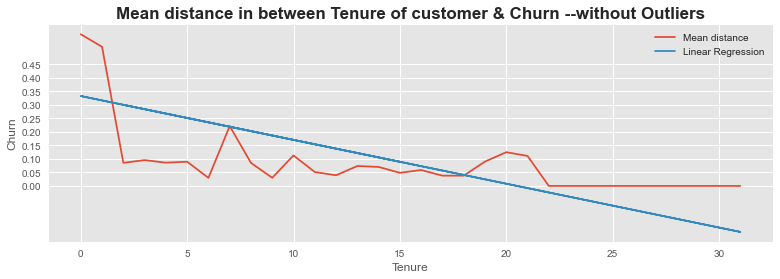

In [ ]:
# Temporarly removing the one outliers
temp = df_clean[df_clean['Tenure'] <= 33]

# Plotting relationship with Churn
plt.style.use('ggplot')
plt.figure(figsize = (13,4))
plt.title('Mean distance in between Tenure of customer & Churn --without Outliers', weight = 'bold', size = 17)
temp.groupby('Tenure')['Churn'].mean().plot(label = 'Mean distance')
print('correlation: ', temp.Churn.corr(temp['Tenure']))
plt.ylabel('Churn')
plt.yticks(np.arange(0,0.5,0.05))

# adding linear regression line
y = temp.Churn
x = temp['Tenure']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, label = 'Linear Regression')
plt.legend()
plt.show()

correlation:  -0.3493529773835948


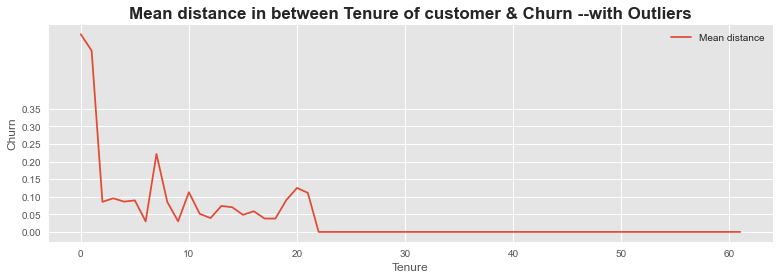

In [ ]:
# Plotting relationship with Churn when outliers are not excluded
plt.figure(figsize = (13,4))
plt.title('Mean distance in between Tenure of customer & Churn --with Outliers', weight = 'bold', size = 17)
df_clean.groupby('Tenure')['Churn'].mean().plot(label = 'Mean distance')
print('correlation: ', df_clean.Churn.corr(df_clean['Tenure']))
plt.ylabel('Churn')
plt.yticks(np.arange(0,0.4,0.05))
plt.legend()
plt.show()

> Mean distance in between DaySinceLastOrder, Tenure & Churn rate masih memiliki plot yang baik meskipun terdapat outlier. Hal ini dapat memberikan informasi yang detail kepada kita ketika DaySinceLastOrder lebih dari 30 hari, maka tingkat churn akan meningkat secara signifikan. Dan semakin lama Tenure pelanggan, terutama jika tenor lebih dari ~22 bulan (3 tahun) maka tingkat churn akan menurun (pelanggan akan lebih memilih untuk tetap menggunakan Layanan/Produk eCommerce)

***NumberOfDeviceRegistered***

correlation:  0.08600476134241668


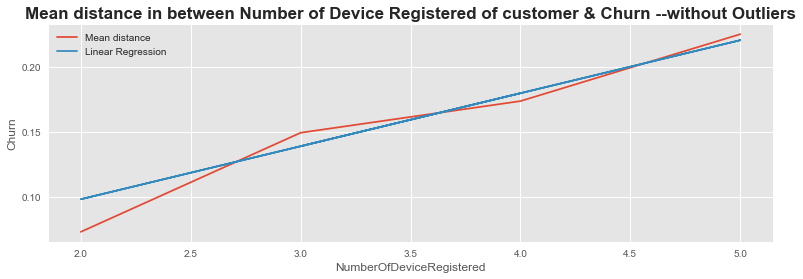

In [ ]:
# Temporarly removing the one outliers
temp = df_clean[(df_clean['NumberOfDeviceRegistered'] >= 1.5) & (df_clean['NumberOfDeviceRegistered'] <= 5.5)]

# Plotting relationship with Churn
plt.style.use('ggplot')
plt.figure(figsize = (13,4))
plt.title('Mean distance in between Number of Device Registered of customer & Churn --without Outliers', weight = 'bold', size = 17)
temp.groupby('NumberOfDeviceRegistered')['Churn'].mean().plot(label = 'Mean distance')
print('correlation: ', temp.Churn.corr(temp['NumberOfDeviceRegistered']))
plt.ylabel('Churn')
plt.yticks(np.arange(0,0.5,0.05))

# adding linear regression line
y = temp.Churn
x = temp['NumberOfDeviceRegistered']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, label = 'Linear Regression')
plt.legend()
plt.show()

correlation:  0.10846417286404285


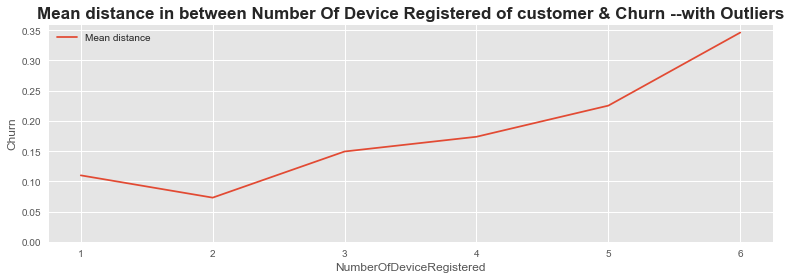

In [ ]:
# Plotting relationship with Churn when outliers are not excluded
plt.figure(figsize = (13,4))
plt.title('Mean distance in between Number Of Device Registered of customer & Churn --with Outliers', weight = 'bold', size = 17)
df_clean.groupby('NumberOfDeviceRegistered')['Churn'].mean().plot(label = 'Mean distance')
print('correlation: ', df_clean.Churn.corr(df_clean['NumberOfDeviceRegistered']))
plt.ylabel('Churn')
plt.yticks(np.arange(0,0.4,0.05))
plt.legend()
plt.show()

> Terlihat jelas untuk variabel `NumberOfDeviceRegistered` tanpa outliers akan memiliki korelasi positif terhadap tingkat churn customer, semakin banyak device yang digunakan oleh cutomer dalam mengakses platform eCommerce ini, maka tingkat churn semakin meningkat. Untuk menangani outliers pada variabel ini, dapat dilakuakn dengan melakukan binning data NumberOfDeviceRegistred menjadi 2 kategori, dimana untuk kategori pertama adalah **NumberOfDeviceRegistred <= 3**, dan kategori kedua adalah **NumberOfDevice Registered > 3**.

##### *Handling Outliers*

In [ ]:
def handlingOutliers(data):
    outlier_num = ['WarehouseToHome']
    maximum = 36.5
    for var in outlier_num:
        if len(data[data[var] > maximum]):
            data.drop(index=data[data[var] > maximum].index, axis=0, inplace=True)
        else:
            break
    return data

In [ ]:
df_clean = handlingOutliers(df_clean)
df_clean

Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0       15.0             29.0                         4  Laptop & Accessory   
1        7.0             25.0                         4              Mobile   
2       27.0             13.0                         3  Laptop & Accessory   
3       20.0             25.0                         4             Fashion   
4       30.0             15.0                         4              Others   
...      ...              ...                       ...                 ...   
3936    28.0              9.0                         5             Fashion   
3937     8.0              7.0                         2        Mobile Phone   
3938    30.0              6.0                         5  Laptop & Accessory   
3939     6.0             14.0                         4              Mobile   
3940     2.0              7.0                         3  Laptop & Accessory   

      SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
0                     3        Single                2         0   
1                     1       Married                2         0   
2                     1       Married                5         0   
3                     3      Divorced                7         0   
4                     4        Single                8         0   
...                 ...           ...              ...       ...   
3936                  3       Married                8         0   
3937                  2        Single                4         0   
3938                  3       Married                3         1   
3939                  3       Married               10         1   
3940                  5       Married                1         0   

      DaySinceLastOrder  CashbackAmount  Churn  Tenure_na  WarehouseToHome_na  \
0                   7.0          143.32      0          0                   0   
1                   7.0          129.29      0          0                   0   
2                   7.0          168.54      0          0                   0   
3                   3.0          230.27      0          0                   0   
4                   8.0          322.17      0          0                   0   
...                 ...             ...    ...        ...                 ...   
3936                1.0          231.86      0          0                   0   
3937                4.0          157.80      0          0                   0   
3938                2.0          156.60      0          0                   0   
3939                0.0          124.37      1          0                   1   
3940                2.0          153.73      0          0                   0   

      DaySinceLastOrder_na  
0                        0  
1                        0  
2                        0  
3                        1  
4                        0  
...                    ...  
3936                     0  
3937                     0  
3938                     0  
3939                     0  
3940                     0  

[3940 rows x 14 columns]

**Log Transformation**

Jika diperhatikan variable `WarehouseToHome` tidak terdisitribusi normal dan memiliki skewness yang cukup signifikan dibandingkan dengan variabel lainnya. Salh satu metode yang dapat dilakukan untuk menangani outlier adalah dengan mentransformasikan distribusi. Misalnya, dalam distribusi yang memiliki semua skor positif dan outlier tinggi, Transformasi log seringkali efektif digunakan untuk mengurangi skewness dari variabel. 

Reference :
- https://help.syncfusion.com/predictive-analytics/modifying-data

In [ ]:
log_vars = [var for var in cont_vars if df_clean[var].isin([0]).sum() == 0]
log_vars

['WarehouseToHome']

In [ ]:
# Applying log transformation
df_log = df_clean.copy()
for var in log_vars:
    df_log[var] = np.log(df_clean[var])

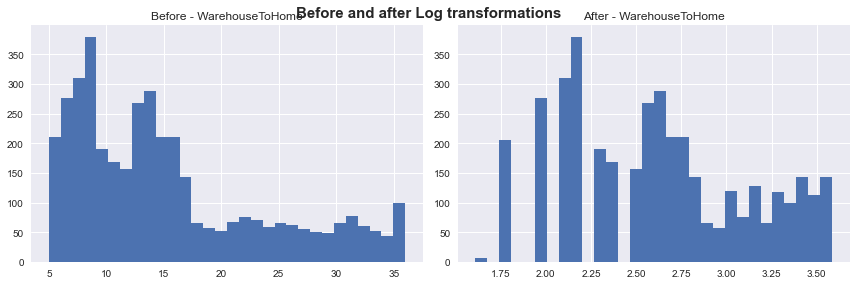

In [ ]:
# Plotting new distributions
plt.style.use('seaborn')
fig, axs = plt.subplots(len(log_vars), 2, figsize = (12,4), tight_layout = True)
fig.suptitle('Before and after Log transformations\n', weight = "bold", size = 15)   
for var in log_vars:
    # Before transformation
    axs[0].set_title(f'Before - {var}')
    axs[0].hist(df_clean[var], bins = 30)
    
    # After transformation
    axs[1].set_title(f'After - {var}')
    axs[1].hist(df_log[var], bins = 30)
    
    continue   
plt.show()

> Kita bisa melihat variabel `WarehouseToHome` tampaknya memiliki distribusi yang sedikit lebih baik setelah transformasi log. 

**Binning Data** <br>

Check Detail Data

In [ ]:
# Function Information Range of Each Numerical Variable
def rangeNumVariable(data):
    listItem = []
    for col in data[num_vars] :
        listItem.append([col, data[col].dtype, round(data[col].mean(),2), data[col].min(), data[col].max()]);

    dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'Mean', 'Min', 'Max'],
                        data=listItem)
    return dfDesc

In [ ]:
rangeNumVariable(df_clean)

dataFeatures dataType    Mean  Min     Max
0                    Tenure  float64   10.00  0.0   61.00
1           WarehouseToHome  float64   15.53  5.0   36.00
2  NumberOfDeviceRegistered    int64    3.68  1.0    6.00
3         SatisfactionScore    int64    3.09  1.0    5.00
4           NumberOfAddress    int64    4.24  1.0   22.00
5                  Complain    int64    0.28  0.0    1.00
6         DaySinceLastOrder  float64    4.45  0.0   46.00
7            CashbackAmount  float64  176.71  0.0  324.99

In [ ]:
df_clean[df_clean['Tenure'] > 36]

Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
51      61.0             28.0                         4             Grocery   
449     51.0              7.0                         2  Laptop & Accessory   
1209    60.0             27.0                         3             Grocery   
3778    50.0              6.0                         1  Laptop & Accessory   

      SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
51                    1       Married                6         1   
449                   3      Divorced                2         0   
1209                  1       Married                5         1   
3778                  3      Divorced                1         0   

      DaySinceLastOrder  CashbackAmount  Churn  Tenure_na  WarehouseToHome_na  \
51                  1.0          303.75      0          0                   0   
449                 9.0          174.00      0          0                   0   
1209                0.0          278.75      0          0                   0   
3778                8.0          149.00      0          0                   0   

      DaySinceLastOrder_na  
51                       0  
449                      0  
1209                     0  
3778                     0

***
**Observation :**
- Variabel `Tenure` merupakan data informasi terkait berapa lama customer menggunakan eCommerce Services. Tenure Customer yang paling lama adalah 61 bulan, tetapi setelah dianalisa lebih lanjut, hanya terdapat 4 customer yang memiliki tenure lebih dari 36 bulan. Maka dari itu, akan diambil data dengan maximum Tenure = 36 bulan kemudian akan dilakukan binning data untuk variabel Tenure menjadi 3 kategori/grup, yaitu ['1 year', '2 year', '3 year'].
- Adapun Variabel `CashbackAmount` merupakan variabel yang berisi informasi terkait jumlah Cashback yang didapatkan customer setiap order produk. Karena ditemukan banyak outliers pada variabel ini, akan dibuat satu variabel baru sebagai alternatif yang berisi hasil binning data variabel `CashbackAmount` menjadi 7 group
***

In [ ]:
# Function to limit the range of Tenure
def tenure3years(data):
    data = data[data['Tenure'] <= 36]
    return data
    
def binningData(data):
    data = tenure3years(data)
    labels_tenure = ['1st year', '2nd year', '3rd year']
    # labels_ca = ['Extremely Low', 'Very Low', 'Low', 'Moderate', 'Middle High', 'High', 'Very High']
    data['TenureGroup'] = pd.cut(data["Tenure"], bins=[-1, 12, 24, 36], labels=labels_tenure)
    data['CashbackAmountGroup'] = pd.cut(data["CashbackAmount"], bins=[-1, 50, 100, 150, 200, 250, 300, 350])
    data['NumberOfDRGroup'] =  pd.cut(df["NumberOfDeviceRegistered"], bins=[0, 3, 6])
    return data

In [ ]:
pd.cut(tenure3years(df_clean)['Tenure'], bins=[-1, 12, 24, 36])

0       (12, 24]
1       (-1, 12]
2       (24, 36]
3       (12, 24]
4       (24, 36]
          ...   
3936    (24, 36]
3937    (-1, 12]
3938    (24, 36]
3939    (-1, 12]
3940    (-1, 12]
Name: Tenure, Length: 3936, dtype: category
Categories (3, interval[int64]): [(-1, 12] < (12, 24] < (24, 36]]

In [ ]:
pd.cut(df_clean["CashbackAmount"], bins=[-1, 50, 100, 150, 200, 250, 300, 350])

0       (100, 150]
1       (100, 150]
2       (150, 200]
3       (200, 250]
4       (300, 350]
           ...    
3936    (200, 250]
3937    (150, 200]
3938    (150, 200]
3939    (100, 150]
3940    (150, 200]
Name: CashbackAmount, Length: 3940, dtype: category
Categories (7, interval[int64]): [(-1, 50] < (50, 100] < (100, 150] < (150, 200] < (200, 250] < (250, 300] < (300, 350]]

In [ ]:
pd.cut(df["NumberOfDeviceRegistered"], bins=[0, 3, 6])

0       (3, 6]
1       (3, 6]
2       (0, 3]
3       (3, 6]
4       (3, 6]
         ...  
3936    (3, 6]
3937    (0, 3]
3938    (3, 6]
3939    (3, 6]
3940    (0, 3]
Name: NumberOfDeviceRegistered, Length: 3941, dtype: category
Categories (2, interval[int64]): [(0, 3] < (3, 6]]

In [ ]:
df_clean = binningData(df_clean)
df_clean

Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0       15.0             29.0                         4  Laptop & Accessory   
1        7.0             25.0                         4              Mobile   
2       27.0             13.0                         3  Laptop & Accessory   
3       20.0             25.0                         4             Fashion   
4       30.0             15.0                         4              Others   
...      ...              ...                       ...                 ...   
3936    28.0              9.0                         5             Fashion   
3937     8.0              7.0                         2        Mobile Phone   
3938    30.0              6.0                         5  Laptop & Accessory   
3939     6.0             14.0                         4              Mobile   
3940     2.0              7.0                         3  Laptop & Accessory   

      SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
0                     3        Single                2         0   
1                     1       Married                2         0   
2                     1       Married                5         0   
3                     3      Divorced                7         0   
4                     4        Single                8         0   
...                 ...           ...              ...       ...   
3936                  3       Married                8         0   
3937                  2        Single                4         0   
3938                  3       Married                3         1   
3939                  3       Married               10         1   
3940                  5       Married                1         0   

      DaySinceLastOrder  CashbackAmount  Churn  Tenure_na  WarehouseToHome_na  \
0                   7.0          143.32      0          0                   0   
1                   7.0          129.29      0          0                   0   
2                   7.0          168.54      0          0                   0   
3                   3.0          230.27      0          0                   0   
4                   8.0          322.17      0          0                   0   
...                 ...             ...    ...        ...                 ...   
3936                1.0          231.86      0          0                   0   
3937                4.0          157.80      0          0                   0   
3938                2.0          156.60      0          0                   0   
3939                0.0          124.37      1          0                   1   
3940                2.0          153.73      0          0                   0   

      DaySinceLastOrder_na TenureGroup CashbackAmountGroup NumberOfDRGroup  
0                        0    2nd year          (100, 150]          (3, 6]  
1                        0    1st year          (100, 150]          (3, 6]  
2                        0    3rd year          (150, 200]          (0, 3]  
3                        1    2nd year          (200, 250]          (3, 6]  
4                        0    3rd year          (300, 350]          (3, 6]  
...                    ...         ...                 ...             ...  
3936                     0    3rd year          (200, 250]          (3, 6]  
3937                     0    1st year          (150, 200]          (0, 3]  
3938                     0    3rd year          (150, 200]          (3, 6]  
3939                     0    1st year          (100, 150]          (3, 6]  
3940                     0    1st year          (150, 200]          (0, 3]  

[3936 rows x 17 columns]

#### **Change Data Type**

In [ ]:
# Function Change Data Type
def changeDataType(data):
    data["Tenure"] = data["Tenure"].apply(np.int64)
    data["WarehouseToHome"] = data["WarehouseToHome"].apply(np.int64)
    data["NumberOfDeviceRegistered"] = data["NumberOfDeviceRegistered"].apply(np.int64)
    data["DaySinceLastOrder"] = data["DaySinceLastOrder"].apply(np.int64)
    data["TenureGroup"] = data["TenureGroup"].astype(str)
    data["CashbackAmountGroup"] = data["CashbackAmountGroup"].astype(str)
    data["NumberOfDRGroup"] = data["NumberOfDRGroup"].astype(str)
    return data

In [ ]:
df_clean = changeDataType(df_clean)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 0 to 3940
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3936 non-null   int64  
 1   WarehouseToHome           3936 non-null   int64  
 2   NumberOfDeviceRegistered  3936 non-null   int64  
 3   PreferedOrderCat          3936 non-null   object 
 4   SatisfactionScore         3936 non-null   int64  
 5   MaritalStatus             3936 non-null   object 
 6   NumberOfAddress           3936 non-null   int64  
 7   Complain                  3936 non-null   int64  
 8   DaySinceLastOrder         3936 non-null   int64  
 9   CashbackAmount            3936 non-null   float64
 10  Churn                     3936 non-null   int64  
 11  Tenure_na                 3936 non-null   int64  
 12  WarehouseToHome_na        3936 non-null   int64  
 13  DaySinceLastOrder_na      3936 non-null   int64  
 14  TenureGr

***
# **Explanatory Data Analysis (EDA)**

***

##### Function Visulization

In [ ]:
def stack_bar(top_labels, colors, x_data, y_data):
    fig = go.Figure()

    for i in range(0, len(x_data[0])):
        for xd, yd in zip(x_data, y_data):
            fig.add_trace(go.Bar(
                x=[xd[i]], y=[yd],
                orientation='h',
                marker=dict(
                    color=colors[i],
                    line=dict(color='rgb(248, 248, 249)', width=1)
                )
            ))
    fig.update_layout(
        xaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=False,
            zeroline=False,
            domain=[0.15, 1]
        ),
        yaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=False,
            zeroline=False,
        ),
        barmode='stack',
        paper_bgcolor='rgb(248, 248, 255)',
        plot_bgcolor='rgb(248, 248, 255)',
        margin=dict(l=120, r=10, t=140, b=80),
        showlegend=False,
    )
    annotations = []

    for yd, xd in zip(y_data, x_data):
        # labeling the y-axis
        annotations.append(dict(xref='paper', yref='y',
                                x=0.14, y=yd,
                                xanchor='right',
                                text=str(yd),
                                font=dict(family='Arial', size=14,
                                        color='rgb(67, 67, 67)'),
                                showarrow=False, align='right'))
        # labeling the first percentage of each bar (x_axis)
        annotations.append(dict(xref='x', yref='y',
                                x=xd[0] / 2, y=yd,
                                text=str(round(xd[0]/np.sum(x_data) * 100, 1)) + '%',
                                font=dict(family='Arial', size=14,
                                        color='rgb(248, 248, 255)'),
                                showarrow=False))
        # labeling the first Likert scale (on the top)
        if yd == y_data[-1]:
            annotations.append(dict(xref='x', yref='paper',
                                    x=xd[0] / 2, y=1.1,
                                    text=top_labels[0],
                                    font=dict(family='Arial', size=14,
                                            color='rgb(67, 67, 67)'),
                                    showarrow=False))
        space = xd[0]
        for i in range(1, len(xd)):
                # labeling the rest of percentages for each bar (x_axis)
                annotations.append(dict(xref='x', yref='y',
                                        x=space + (xd[i]/2), y=yd,
                                        text=str(round(xd[i]/np.sum(x_data) * 100, 1)) + '%',
                                        font=dict(family='Arial', size=14,
                                                color='rgb(248, 248, 255)'),
                                        showarrow=False))
                # labeling the Likert scale
                if yd == y_data[-1]:
                    annotations.append(dict(xref='x', yref='paper',
                                            x=space + (xd[i]/2), y=1.1,
                                            text=top_labels[i],
                                            font=dict(family='Arial', size=14,
                                                    color='rgb(67, 67, 67)'),
                                            showarrow=False))
                space += xd[i]

    fig.update_layout(annotations=annotations)
    return fig.show()

#### *For Target Variable*

In [ ]:
top_labels = ['Existing Customers/Not Churn(0)', 'Churn(1)']
colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)']
x_data = [[len(df[df['Churn'] == 0]), len(df[df['Churn'] == 1])]]
y_data = ['Did the customer leave?']

stack_bar(top_labels, colors, x_data, y_data)

***
**Observation :**

Dapat dilihat berdasarkan hasil di atas, data yang dimiliki cukup `imbalance`. Dimana hanya 17.1% data kelas positif (Churn). Hal ini akan mempengaruhi hasil klasifikasi nantinya, maka dari itu akan dilakukan pendekatan untuk mengatasi masalah data imbalance ini dengan metode resampling menggunakan SMOTE (Synthetic Minority Oversampling) yaitu teknik yang dapat membangkitkan sejumlah data baru yang mirip dengan data kelas minoritas hingga distribusinya lebih berimbang.

***

**Exploring continuous variables relationship with Churn**

correlation with churn rate:  -0.3523025227088334


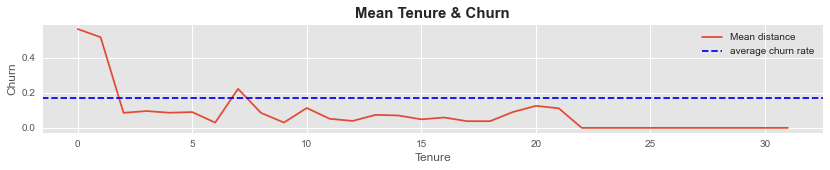

correlation with churn rate:  0.06810117440431673


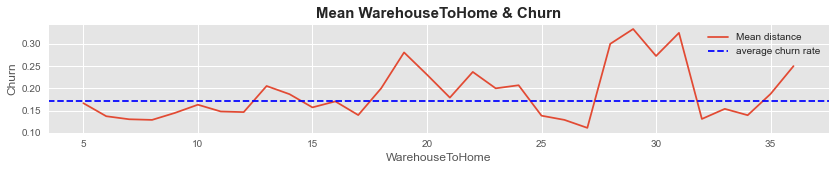

correlation with churn rate:  -0.15624579622849916


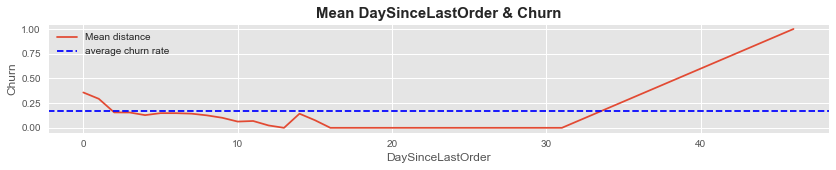

correlation with churn rate:  -0.16136388638552993


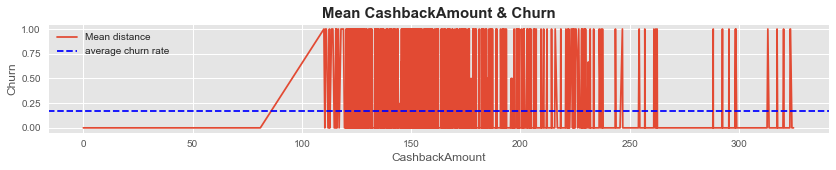

In [ ]:
plt.style.use('ggplot')

for var in cont_vars:
        plt.figure(figsize = (14,2))
        plt.title(f'Mean {var} & Churn', weight = 'bold', size = 15)
        df_clean.groupby(f'{var}')['Churn'].mean().plot(label = 'Mean distance')
        print('correlation with churn rate: ', df_clean.Churn.corr(df_clean[f'{var}']))
        plt.axhline(y = df_clean.Churn.mean(), color = 'b', linestyle = '--', label = 'average churn rate')
        plt.ylabel('Churn')

        plt.legend()
        plt.show()

***
**Observation :**
* Ketika Tenure rendah, kecenderungan *customer churn* semakin tinggi
* Tingkat churn sedikit meningkat, jika jarak WarehoseToHome customer lebih dari 23
* Semakin lama Customer tidak melakukan pemesanan sejak pemesanan terakhir (DaySinceLastOrder), tingkat churn juga meningkat, meskipun tampaknya ada korelasi negatif. Hal ini bisa disebabkan karena adanya outlier.
* Tidak begitu telihat jelas hubungan antara rata-rata cashback dan tingkat churn pada plot tersebut. Maka dari itu, ntuk melihat lebih detail kita  menggunakan plot histogram agar kita mengetahui secara spesifik distribusi CashbackAmount dan kecenderungan customer churn berdasarkan nilai Cashback.

***

#### *Continous Variables & Churn*

In [ ]:
for col in df_clean[cont_vars].columns.tolist():
    title = 'Distribution of ' + col
    df_dis = px.histogram(df_clean,  x=col, color="Churn", marginal="box", title=title, hover_data=df_clean.columns, width=800, height=400)
    df_dis.show()
    print('---------------------------------------------------------------------')
    print(f'{col} spearman correlation with churn rate: ', round(df_clean.Churn.corr(df_clean[f'{col}'], method = 'spearman'),3))
    print('---------------------------------------------------------------------')

---------------------------------------------------------------------
Tenure spearman correlation with churn rate:  -0.402
---------------------------------------------------------------------


---------------------------------------------------------------------
WarehouseToHome spearman correlation with churn rate:  0.071
---------------------------------------------------------------------


---------------------------------------------------------------------
DaySinceLastOrder spearman correlation with churn rate:  -0.182
---------------------------------------------------------------------


---------------------------------------------------------------------
CashbackAmount spearman correlation with churn rate:  -0.183
---------------------------------------------------------------------


***
**Observation :**
* Mayoritas pelanggan memiliki Tenure pendek. Pelanggan baru yang masa Tenurenya 0-1 bulan memiliki kecenderungan untuk Churn. Berdasarkan diagram, terlihat bahwa semakin lama Tenure, semakin kecil kemungkinan churn. Dalam hal ini, tidak ditemukan adanya pelanggan yang churn ketika Tenurenya lebih dari 2 tahun (> 24 bulan)
* Pada variabel WarehouseToHome, ditemukan tingkat churn yang cukup tinggi jika WarehouseToHome sekitar 6 - 17 km dibandingkan dengan pelanggan yang jarak rumahnya dari warehouse < 6 km atau > 17 km.
* Jika dilihat dari distribusi untuk variabel DaySinceLastOrder, pelanggan memiliki kecenderungan melakukan churn ketika hari terakhir pemesanannya kurang dari 4 hari. Hal ini kemungkinan terjadi karena bisa saja pelanggan tersebut termasuk dalam kategori pelanggan baru yang tenurenya masih kurang dari 1 tahun. 
* Untuk variabel CashbackAmount, pelanggan memiliki kecenderungan untuk churn jika pelanggan memiliki cashback amount yang rendah dengan mayoritas dalam range 117.5 USD - 167.49 USD. Jika cashback yang diperoleh semakin besar, tingkat churn semakin berkurang

***

#### *Discrete Variables & Churn*

In [ ]:
for col in df_clean[dis_vars].columns.tolist():
    title = 'Distribution of ' + col
    df_dis = px.histogram(df_clean,  x=col, color="Churn", histfunc='count', barnorm='percent', barmode='group', title=title, hover_data=df_clean.columns, width=800, height=400)
    df_dis.show()
    print('---------------------------------------------------------------------')
    print(f'{col} spearman correlation with churn rate: ', round(df_clean.Churn.corr(df_clean[f'{col}'], method = 'spearman'),3))
    print('---------------------------------------------------------------------')

---------------------------------------------------------------------
NumberOfDeviceRegistered spearman correlation with churn rate:  0.104
---------------------------------------------------------------------


---------------------------------------------------------------------
SatisfactionScore spearman correlation with churn rate:  0.106
---------------------------------------------------------------------


---------------------------------------------------------------------
Complain spearman correlation with churn rate:  0.262
---------------------------------------------------------------------


In [ ]:
title = 'Distribution of SatisfactionScore of Tenure Group Churn Customers'
fig = px.histogram(df_clean[df_clean['Churn'] == 1], x='TenureGroup', barnorm='percent', barmode='group', histfunc='count', color='SatisfactionScore', title=title, hover_data=df_clean.columns, width=800, height=400)
fig.show()

***
**Observation :**
* Ketika jumlah perangkat yang teregister (NumberOfDeviceRegistered) > 3, terlihat bahwa tingkat churn semakin meningkat
* Jika kita memperhatikan plot SatisfactionScore, semakin tinggi nilai satisfaction yang diberikan oleh pelanggan juga akan menjadi indikasi pelanggan melakukan churn. Yang menarik, sekitar ~30.8% pelanggan yang churn di tahun pertama memberikan nilai satisfaction 5. 
* Jika dilihat dari plotnya, pelanggan yang melakukan complain memiliki potensi untuk melakukan churn.

***

### *Categorical Variables & Churn*

In [ ]:
cat_vars_new = [var for var in df.columns if df[var].dtype == 'O']

In [ ]:
for col in cat_vars_new:
    title = 'Distribution of ' + col
    fig = px.histogram(df_clean, x=col, histfunc='count', color='Churn', title=title, hover_data=df_clean.columns, width=800, height=400)
    if col == 'TenureGroup':
        fig.update_xaxes(categoryorder='array', categoryarray= ['1st year', '2nd year', '3rd year'])
    if col == 'CashbackAmountGroup':
        fig.update_xaxes(categoryorder='array', categoryarray= ['(-1, 50]', '(50, 100]', '(100, 150]', '(150, 200]', '(200, 250]', '(250, 300]', '(300, 350]'])
        
    fig.show()
    print('---------------------------------------------------------------------')
    print(f'{col} spearman correlation with churn rate: ', round(df_clean.Churn.corr(df_clean[f'{col}'], method = 'spearman'),3))
    print('---------------------------------------------------------------------')

---------------------------------------------------------------------
PreferedOrderCat spearman correlation with churn rate:  0.146
---------------------------------------------------------------------


---------------------------------------------------------------------
MaritalStatus spearman correlation with churn rate:  0.152
---------------------------------------------------------------------


***
**Observation :**

- Berdasarkan Distribusi `PreferedOrderCat`. Sebagian besar pelanggan suka memesan Kategori **Laptop & Accessory** dari eCommerce ini, dan banyak juga pelanggan yang memesan kategori **Mobile Phone**. Terdapat 6 kategori dalam variabel `PreferedOrderCat`, kita menemukan Kategori **Mobile Phone** dan Kategori **Phone** tampaknya memiliki arti yang sama, jadi sebaiknya kita menggabungkan kedua kategori ini, dan juga jika diperhatikan kategori **Grocery** dan **Others** tidak memiliki nilai yang cukup signifikan dibandingkan dengan kategori lainnya, maka dari itu kita juga akan menggabungkan kategori **Grocery** pada kategori **Others** untuk mengurangi jumlah kategori di langkah selanjutnya<br-
- Dari distribusi `MaritalStatus`, kita dapat menyimpulkan bahwa sebagian besar pelanggan churn berstatus **Single**, dan jika diperhatikan Customer yang memiliki Status **Divorced** tidak memiliki jumlah yang signifikan dan bisa digabungkan dengan kategori **Single** sehingga menjadi kategori **Single/Divorced** untuk mengurangi jumlah kategori. Meskipun single dan divorced berbeda tetapi keduanya memiliki konteks kondisi yang sama. 

***

***
**Conclusion :**



***
# **Data Preprocessing & Feature Selection**

***

Pada tahapan yang telah kita lakukan sebelumnya sebelum dilakukan tahapan feature selection, feature engineering dan modelling, terdapat beberapa urutan proses, sebagai :
1. Melakukan load dataset, mengecek data duplikat dan data missing value
2. Melakukan handling missing value dengan impute nilai median dan menambahkan variabel baru berupa binary missing value flags untuk menandakan row data yang mengandung missing value dan dilakukan impute value pada variabel tersebut.
3. Melakukan handling outliers, dimana untuk variabel `WarehouseToHome` kita lakukan remove terhadap data yang merupakan outliers karena hanya berjumlah sedikt (1 data) dan kita lakukan log trasformation untuk variabel ini karena memiliki nilai right skewness yang cukup tinggi.
4. Melakukan binning terhadap variabel-variabel nummerik tertentu, seperti Tenure, CashbackAmount, dan NumberOfDeviceRegistered. Dan membatasi dataset dengan hanya menggunakan data yang memiliki nilai tenure 0 - 36 bulan. Karena jika diperhatikan, data pelanggan dengan masa tenure yang lebih dari 36 bulan hanya berjumlah sedikit (4 data) dan mayoritas merupakan pelanggan yang tidak melakukan churn. 
5. Menyesuaikan tipe data
7. Mengubah dictionary data kategorikal pada variable `PreferedOrderCat` yaitu mengubah Kategori Mobile => Mobile Phone dan Grocery => Others 
6. Mengubah urutan kolom/fitur dengan urutan pertama adalah kolom/fitur kategorikal kemudian dilanjutkan dengan kolom/fitur numerik
  

Function Data Preprocessing

In [ ]:
def handlingMissingValue(data):
    num_vars = [var for var in data.columns if data[var].dtype != 'O' and var !='Churn']
    num_with_nan = [var for var in num_vars if data[var].isnull().sum() > 0]
    for var in num_with_nan:
        # add binary missing indicator 
        data[var + '_na'] = np.where(data[var].isnull(), 1, 0)

    data['Tenure'] = data['Tenure'].fillna(data.groupby(['MaritalStatus'])['Tenure'].transform('median'))
    data['WarehouseToHome'] = data['WarehouseToHome'].fillna(data.groupby(['MaritalStatus'])['WarehouseToHome'].transform('median'))
    data['DaySinceLastOrder'] = data['DaySinceLastOrder'].fillna(data.groupby(['MaritalStatus'])['DaySinceLastOrder'].transform('median'))
    return data

def handlingOutliers(data):
    outlier_num = ['WarehouseToHome']
    maximum = 36.5
    for var in outlier_num:
        if len(data[data[var] > maximum]):
            data.drop(index=data[data[var] > maximum].index, axis=0, inplace=True)
        else:
            break
    return data


# Function to limit the range of Tenure
def tenure3years(data):
    data = data[data['Tenure'] <= 36]
    return data

def binningData(data):
    data = tenure3years(data)
    labels_tenure = ['1st year', '2nd year', '3rd year']
    data['TenureGroup'] = pd.cut(data["Tenure"], bins=[-1, 12, 24, 36], labels=labels_tenure)
    data['CashbackAmountGroup'] = pd.cut(data["CashbackAmount"], bins=[-1, 50, 100, 150, 200, 250, 300, 350])
    data['NumberOfDRGroup'] =  pd.cut(data["NumberOfDeviceRegistered"], bins=[0, 3, 6])
    return data

def changeDataType(data):
    data["Tenure"] = data["Tenure"].apply(np.int64)
    data["WarehouseToHome"] = data["WarehouseToHome"].apply(np.int64)
    data["NumberOfDeviceRegistered"] = data["NumberOfDeviceRegistered"].apply(np.int64)
    data["DaySinceLastOrder"] = data["DaySinceLastOrder"].apply(np.int64)
    data["TenureGroup"] = data["TenureGroup"].astype(str)
    data["CashbackAmountGroup"] = data["CashbackAmountGroup"].astype(str)
    data["NumberOfDRGroup"] = data["NumberOfDRGroup"].astype(str)
    return data

# Replace Non-Standard Value to Standard Value
def changeValue(data):
    orderCat_dict = {'Mobile':'Mobile Phone', 'Grocery':'Others'}
    orderCat_dict_marital = {'Divorced':'Single/Divorced', 'Single':'Single/Divorced'}
    data['PreferedOrderCat'] = data['PreferedOrderCat'].replace(orderCat_dict)
    data['MaritalStatus'] = data['MaritalStatus'].replace(orderCat_dict_marital)
    return data

# Function Reordering columns
def order_column(data):
    cat_features = [feature for feature in data.columns if ((data[feature].dtypes == 'O'))]
    num_features_all = [feature for feature in data.columns if ((data[feature].dtypes != 'O'))]
    cols = cat_features + num_features_all
    data = data[cols]
    return data

def preprocessing(data):
    data = handlingMissingValue(data)
    data = handlingOutliers(data)
    data = tenure3years(data)
    data = binningData(data)
    data = changeDataType(data)
    data = changeValue(data)
    data = order_column(data)
    return data

Pada tahap preprocessing data ini, kita hanya akan menggunakan function yang telah didefine dan digunakan sebelumnya. Sehingga data yang sudah diproses siap digunakan untuk membangun model klasifikasi.

In [ ]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df = preprocessing(df)
df.head()

PreferedOrderCat    MaritalStatus TenureGroup CashbackAmountGroup  \
0  Laptop & Accessory  Single/Divorced    2nd year          (100, 150]   
1        Mobile Phone          Married    1st year          (100, 150]   
2  Laptop & Accessory          Married    3rd year          (150, 200]   
3             Fashion  Single/Divorced    2nd year          (200, 250]   
4              Others  Single/Divorced    3rd year          (300, 350]   

  NumberOfDRGroup  Tenure  WarehouseToHome  NumberOfDeviceRegistered  \
0          (3, 6]      15               29                         4   
1          (3, 6]       7               25                         4   
2          (0, 3]      27               13                         3   
3          (3, 6]      20               25                         4   
4          (3, 6]      30               15                         4   

   SatisfactionScore  NumberOfAddress  Complain  DaySinceLastOrder  \
0                  3                2         0                  7   
1                  1                2         0                  7   
2                  1                5         0                  7   
3                  3                7         0                  3   
4                  4                8         0                  8   

   CashbackAmount  Churn  Tenure_na  WarehouseToHome_na  DaySinceLastOrder_na  
0          143.32      0          0                   0                     0  
1          129.29      0          0                   0                     0  
2          168.54      0          0                   0                     0  
3          230.27      0          0                   0                     1  
4          322.17      0          0                   0                     0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 0 to 3940
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PreferedOrderCat          3936 non-null   object 
 1   MaritalStatus             3936 non-null   object 
 2   TenureGroup               3936 non-null   object 
 3   CashbackAmountGroup       3936 non-null   object 
 4   NumberOfDRGroup           3936 non-null   object 
 5   Tenure                    3936 non-null   int64  
 6   WarehouseToHome           3936 non-null   int64  
 7   NumberOfDeviceRegistered  3936 non-null   int64  
 8   SatisfactionScore         3936 non-null   int64  
 9   NumberOfAddress           3936 non-null   int64  
 10  Complain                  3936 non-null   int64  
 11  DaySinceLastOrder         3936 non-null   int64  
 12  CashbackAmount            3936 non-null   float64
 13  Churn                     3936 non-null   int64  
 14  Tenure_n

### **Feature Selections**

Tahap ini berguna untuk ‘membuang’ data yang tidak ada korelasinya ataupun memiliki multikolinearitas yang tinggi terhadap variabel lainnya, dengan tujuan untuk meningkatkan keakuratan data dalam melakukan prediksi. Multikolinearitas dalam suatu model dapat diketahui dengan menghitung nilai Variance Inflation Factor (VIF). VIF adalah suatu faktor yang mengukur seberapa besar kenaikan ragam dari koefisien penduga regresi dibandingkan terhadap variabel bebas yang
orthogonal jika dihubungkan secara linear. Nilai VIF akan semakin besar jika terdapat korelasi yang semakin besar diantara variabel bebas. Nilai VIF > 10 dapat digunakan sebagai petunjuk adanya multikolinearitas.

https://bbs.binus.ac.id/management/2019/12/analisis-uji-asumsi-klasik/


In [ ]:
# Function for calculating VIF.
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['Acceptable'] = vif['VIF'].apply(lambda x: 'Yes' if x <= 10 else 'No')
    return(vif)

def ols(y, X):
    sm_lm = sm.OLS(y, sm.add_constant(X))
    result = sm_lm.fit()
    return result

**With All Variables**

In [ ]:
df_churn = pd.get_dummies(df, drop_first=True)
df_churn

Tenure  WarehouseToHome  NumberOfDeviceRegistered  SatisfactionScore  \
0         15               29                         4                  3   
1          7               25                         4                  1   
2         27               13                         3                  1   
3         20               25                         4                  3   
4         30               15                         4                  4   
...      ...              ...                       ...                ...   
3936      28                9                         5                  3   
3937       8                7                         2                  2   
3938      30                6                         5                  3   
3939       6               14                         4                  3   
3940       2                7                         3                  5   

      NumberOfAddress  Complain  DaySinceLastOrder  CashbackAmount  Churn  \
0                   2         0                  7          143.32      0   
1                   2         0                  7          129.29      0   
2                   5         0                  7          168.54      0   
3                   7         0                  3          230.27      0   
4                   8         0                  8          322.17      0   
...               ...       ...                ...             ...    ...   
3936                8         0                  1          231.86      0   
3937                4         0                  4          157.80      0   
3938                3         1                  2          156.60      0   
3939               10         1                  0          124.37      1   
3940                1         0                  2          153.73      0   

      Tenure_na  WarehouseToHome_na  DaySinceLastOrder_na  \
0             0                   0                     0   
1             0                   0                     0   
2             0                   0                     0   
3             0                   0                     1   
4             0                   0                     0   
...         ...                 ...                   ...   
3936          0                   0                     0   
3937          0                   0                     0   
3938          0                   0                     0   
3939          0                   1                     0   
3940          0                   0                     0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
0                                       1                              0   
1                                       0                              1   
2                                       1                              0   
3                                       0                              0   
4                                       0                              0   
...                                   ...                            ...   
3936                                    0                              0   
3937                                    0                              1   
3938                                    1                              0   
3939                                    0                              1   
3940                                    1                              0   

      PreferedOrderCat_Others  MaritalStatus_Single/Divorced  \
0                           0                              1   
1                           0                              0   
2                           0                              0   
3                           0                              1   
4                           1                              1   
...                       ...                            ...   
3936                        0                     

In [ ]:
# Creating OLS model.
X = df_churn.drop(['Churn'], axis=1)
y = df_churn['Churn']

print(ols(y, X).summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     73.21
Date:                Wed, 31 Aug 2022   Prob (F-statistic):          7.87e-293
Time:                        11:22:41   Log-Likelihood:                -1012.1
No. Observations:                3936   AIC:                             2074.
Df Residuals:                    3911   BIC:                             2231.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
calc_vif(X)

Feature         VIF Acceptable
0                                Tenure   13.996123         No
1                       WarehouseToHome    4.717601        Yes
2              NumberOfDeviceRegistered   39.181910         No
3                     SatisfactionScore    6.024842        Yes
4                       NumberOfAddress    4.052559        Yes
5                              Complain    1.411640        Yes
6                     DaySinceLastOrder    3.117985        Yes
7                        CashbackAmount  328.383643         No
8                             Tenure_na    1.487829        Yes
9                    WarehouseToHome_na    1.268192        Yes
10                 DaySinceLastOrder_na    1.898440        Yes
11  PreferedOrderCat_Laptop & Accessory    7.457791        Yes
12        PreferedOrderCat_Mobile Phone   11.079176         No
13              PreferedOrderCat_Others    6.573806        Yes
14        MaritalStatus_Single/Divorced    1.975611        Yes
15                 TenureGroup_2nd year    4.810850        Yes
16                 TenureGroup_3rd year    4.190214        Yes
17       CashbackAmountGroup_(100, 150]   95.081278         No
18       CashbackAmountGroup_(150, 200]  149.166123         No
19       CashbackAmountGroup_(200, 250]   59.546790         No
20       CashbackAmountGroup_(250, 300]   56.992249         No
21       CashbackAmountGroup_(300, 350]   23.093979         No
22        CashbackAmountGroup_(50, 100]    1.060921        Yes
23               NumberOfDRGroup_(3, 6]    7.648627        Yes

***
Dengan menggunakan seluruh variabel, ditemukan masih banyak variabel yang memiliki nilai VIF yang cukup besar (> 10). Sehingga kita akan coba melakukan kombinasi fitur yang lain agar nilai VIF < 10 dan fitur-fiturnya memiliki korelasi terhadap variabel target. 
***

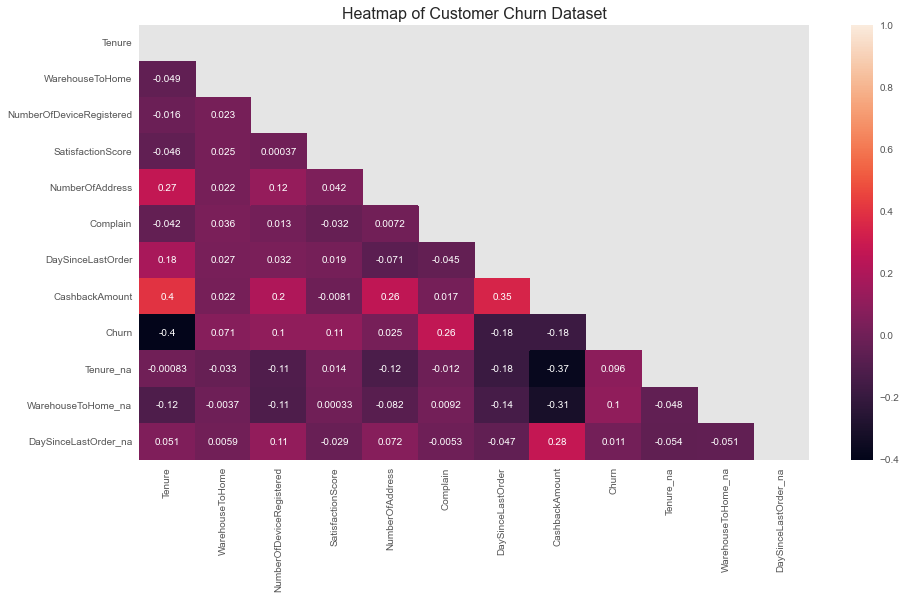

In [ ]:
mask = np.zeros_like(df.corr(method='spearman')) 
mask[np.triu_indices_from(mask)]=True 

plt.figure(figsize=(15, 8))
plt.title('Heatmap of Customer Churn Dataset', size=16)
sns.heatmap(df.corr(method='spearman'), annot=True, mask=mask, vmax=1);

**New Combination**

In [ ]:
df_churn = pd.get_dummies(df.drop(['CashbackAmountGroup', 'CashbackAmount', 'NumberOfDeviceRegistered'], axis=1), drop_first=True)
df_churn

Tenure  WarehouseToHome  SatisfactionScore  NumberOfAddress  Complain  \
0         15               29                  3                2         0   
1          7               25                  1                2         0   
2         27               13                  1                5         0   
3         20               25                  3                7         0   
4         30               15                  4                8         0   
...      ...              ...                ...              ...       ...   
3936      28                9                  3                8         0   
3937       8                7                  2                4         0   
3938      30                6                  3                3         1   
3939       6               14                  3               10         1   
3940       2                7                  5                1         0   

      DaySinceLastOrder  Churn  Tenure_na  WarehouseToHome_na  \
0                     7      0          0                   0   
1                     7      0          0                   0   
2                     7      0          0                   0   
3                     3      0          0                   0   
4                     8      0          0                   0   
...                 ...    ...        ...                 ...   
3936                  1      0          0                   0   
3937                  4      0          0                   0   
3938                  2      0          0                   0   
3939                  0      1          0                   1   
3940                  2      0          0                   0   

      DaySinceLastOrder_na  PreferedOrderCat_Laptop & Accessory  \
0                        0                                    1   
1                        0                                    0   
2                        0                                    1   
3                        1                                    0   
4                        0                                    0   
...                    ...                                  ...   
3936                     0                                    0   
3937                     0                                    0   
3938                     0                                    1   
3939                     0                                    0   
3940                     0                                    1   

      PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                                 0                        0   
1                                 1                        0   
2                                 0                        0   
3                                 0                        0   
4                                 0                        1   
...                             ...                      ...   
3936                              0                        0   
3937                              1                        0   
3938                              0                        0   
3939                              1                        0   
3940                              0                        0   

      MaritalStatus_Single/Divorced  TenureGroup_2nd year  \
0                                 1                     1   
1                                 0                     0   
2                                 0                     0   
3                                 1                     1   
4                                 1                     0   
...                             ...                   ...   
3936                              0                     0   
3937                              1                     0   
3938                              0                     0   
3939                              0                     0   
3940                           

In [ ]:
# Creating OLS model.
X = df_churn.drop(['Churn'], axis=1)
y = df_churn['Churn']

print(ols(y, X).summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     106.0
Date:                Wed, 31 Aug 2022   Prob (F-statistic):          5.97e-291
Time:                        11:22:43   Log-Likelihood:                -1034.9
No. Observations:                3936   AIC:                             2104.
Df Residuals:                    3919   BIC:                             2211.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
calc_vif(X)

Feature        VIF Acceptable
0                                Tenure  12.370040         No
1                       WarehouseToHome   4.091393        Yes
2                     SatisfactionScore   5.123974        Yes
3                       NumberOfAddress   3.710425        Yes
4                              Complain   1.370718        Yes
5                     DaySinceLastOrder   2.736728        Yes
6                             Tenure_na   1.301981        Yes
7                    WarehouseToHome_na   1.167456        Yes
8                  DaySinceLastOrder_na   1.238869        Yes
9   PreferedOrderCat_Laptop & Accessory   2.996042        Yes
10        PreferedOrderCat_Mobile Phone   3.294234        Yes
11              PreferedOrderCat_Others   1.954729        Yes
12        MaritalStatus_Single/Divorced   1.881129        Yes
13                 TenureGroup_2nd year   4.610745        Yes
14                 TenureGroup_3rd year   3.949889        Yes
15               NumberOfDRGroup_(3, 6]   2.661841        Yes

***
**Observation :**

Berdasarkan hasil feature selection dengan mengecek nilai VIF dari setiap kolom/fitur yang digunakan, diperoleh kombinasi fitur yang semua nilai VIF < 10, yaitu dengan memilih semua kolom/fitur kecuali `CashbackAmountGroup`, `CashbackAmount`, `NumberOfDeviceRegistered`. Kombinasi fitur ini akan kita coba pada tahapan pembuatan model, dan juga akan memperhatikan hasil evaluation metricsnya apakah sudah cukup tinggi atau belum, dan akan dibandingkan dengan kombinasi fitur lainnya.

Adapun kombinasi fitur lainnya yang akan kita coba di dalam proses modelling, yaitu :
1. Kombinasi Default Variabel: 
* Variabel default hasil binning : `TenureGroup`, `CashbackAmountGroup`, `NumberOfDRGroup`, `WarehouseToHome`, `SatisfactionScore`, `NumberOfAddress`, `Complain`, `DaySinceLastOrder`, `PreferedOrderCat`, `MaritalStatus`
* Variabel default: `Tenure`, `CashbackAmount`, `NumberOfDeviceRegistered`, `WarehouseToHome`, `SatisfactionScore`, `NumberOfAddress`, `Complain`, `DaySinceLastOrder`, `PreferedOrderCat`, `MaritalStatus`
2. Kombinasi fitur menggunakan semua fitur kecuali `CashbackAmountGroup`, `NumberOfDeviceRegistered`


***
# **Feature Engineering**

***

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
# Combination 1 Berdasarkan VIF
column1 = df.drop(['CashbackAmountGroup', 'CashbackAmount', 'NumberOfDeviceRegistered', 'Churn'], axis=1).columns

# Combination 2a
column2a = df.drop(['CashbackAmountGroup', 'TenureGroup', 'NumberOfDRGroup', 'DaySinceLastOrder_na', 'WarehouseToHome_na', 'Tenure_na', 'Churn'], axis=1).columns

# Combination 2b
column2b = df.drop(['CashbackAmount', 'Tenure', 'NumberOfDeviceRegistered', 'DaySinceLastOrder_na', 'WarehouseToHome_na', 'Tenure_na', 'Churn'], axis=1).columns

# Combination 3
column3 = df.drop(['CashbackAmountGroup', 'NumberOfDeviceRegistered', 'Churn'], axis=1).columns

In [ ]:
# Default Variable
X_train = df[column3]
y_train = df[['Churn']]

X_train.shape, y_train.shape

((3936, 14), (3936, 1))

### **Pipeline**

In [ ]:
cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']
num_vars = [var for var in X_train.columns if X_train[var].dtype != 'O' and var !='Churn']
cont_vars = [var for var in num_vars if X_train[var].nunique() > 14]
dis_vars = [var for var in num_vars if X_train[var].nunique() < 14]

print(f'There are {len(cat_vars)} categorical features:\n{cat_vars}')

print(f'\nThere are {len(num_vars)} numerical features:\n{num_vars}')

print(f'\nContinous Variables:\n{cont_vars}')
print(f'\nDiscrete Variables:\n{dis_vars}')

There are 4 categorical features:
['PreferedOrderCat', 'MaritalStatus', 'TenureGroup', 'NumberOfDRGroup']

There are 10 numerical features:
['Tenure', 'WarehouseToHome', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'Tenure_na', 'WarehouseToHome_na', 'DaySinceLastOrder_na']

Continous Variables:
['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

Discrete Variables:
['SatisfactionScore', 'Complain', 'Tenure_na', 'WarehouseToHome_na', 'DaySinceLastOrder_na']


In [ ]:
log_vars = [var for var in cont_vars if X_train[var].isin([0]).sum() == 0]
log_vars

['WarehouseToHome']

***
Sekarang mari kita melakukan fitur encoding untuk fitur2 categorical yang kita miliki.
Yang akan kita lakukan adalah :
1. Merubah fitur/kolom `TenureGroup` menjadi integer 0-2 dengan Ordinal Encoding, karena fitur ini menunjukkan masa Tenure customer dalam satuan tahun, dimana 1st year akan kita rubah menjadi 1, 2nd year akan kita rubah menjadi 2, dan 3rd year akan kita rubah menjadi 3.
2. Merubah fitur/kolom `NumberOfDRGroup` menjadi integer 0-1 dengan Ordinal Encoding, karena fitur ini menunjukkan jumlah device yang digunakan oleh customer dimana (0,3] kita rubah menjadi 0, dan (3, 6] akan kita rubah menjadi 1.
3. Merubah fitur/kolom `PreferedOrderCat` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
4. Merubah fitur/kolom `MaritalStatus` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
5. Melakukan log transform pada variabel `WarehouseToHome` 
6. Melakukan scaling untuk beberapa variabel numberik kecuali `WarehouseToHome`, untuk diterapkan pada uji model klasifikasi yang membutuhkan scaling dalam pemodelan. 
***

In [ ]:
ordinal_mapping = [
    {'col': 'TenureGroup',
    'mapping': {'1st year':0, '2nd year':1, '3rd year':2}},
    {'col': 'NumberOfDRGroup',
    'mapping': {'(0, 3]':0, '(3, 6]':1}}
]

ordinal_encoder = ce.OrdinalEncoder(cols = ['TenureGroup', 'NumberOfDRGroup'], mapping= ordinal_mapping)

In [ ]:
# For combination 2
# ordinal_mapping = [
#     {'col': 'TenureGroup',
#     'mapping': {'1st year':1, '2nd year':2, '3rd year':3}},
#     {'col': 'NumberOfDRGroup',
#     'mapping': {'(0, 3]':1, '(3, 6]':2}},
#     {'col': 'CashbackAmountGroup',
#     'mapping': {'(-1, 50]':1, '(50, 100]':2, '(100, 150]':3, '(150, 200]':4, '(200, 250]':5, '(250, 300]':6, '(300, 350]':7}}
# ]

# ordinal_encoder = ce.OrdinalEncoder(cols = ['TenureGroup', 'NumberOfDRGroup', 'CashbackAmountGroup'], mapping= ordinal_mapping)

# For combination #2.a

# transformer = ColumnTransformer([
#     ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
# ], remainder='passthrough')

# transformerLog = ColumnTransformer([
#     ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
#     ('func_log', FunctionTransformer(np.log1p), log_vars)
# ], remainder='passthrough')

# transformerLog_withScale = ColumnTransformer([
#     ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
#     ('func_log', FunctionTransformer(np.log1p), log_vars),
#     ('scaler', RobustScaler(), [var for var in column2a if (var != 'WarehouseToHome') & (X_train[var].dtype != 'O')])
# ], remainder='passthrough')

# For Combination #2.b
# transformer = ColumnTransformer([
#     ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
#     ('ordinal encoder', ordinal_encoder, ['TenureGroup', 'NumberOfDRGroup', 'CashbackAmountGroup'])
# ], remainder='passthrough')

# transformerLog = ColumnTransformer([
#     ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
#     ('ordinal encoder', ordinal_encoder, ['TenureGroup', 'NumberOfDRGroup', 'CashbackAmountGroup']),
#     ('func_log', FunctionTransformer(np.log1p), log_vars)
# ], remainder='passthrough')

# transformerLog_withScale = ColumnTransformer([
#     ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
#     ('ordinal encoder', ordinal_encoder, ['TenureGroup', 'NumberOfDRGroup', 'CashbackAmountGroup']),
#     ('func_log', FunctionTransformer(np.log1p), log_vars),
#     ('scaler', RobustScaler(), [var for var in column2b if (var != 'WarehouseToHome') & (X_train[var].dtype != 'O')])
# ], remainder='passthrough')

In [ ]:
# for X train default
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
    ('ordinal encoder', ordinal_encoder, ['TenureGroup', 'NumberOfDRGroup'])
], remainder='passthrough')

transformerLog = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
    ('ordinal encoder', ordinal_encoder, ['TenureGroup', 'NumberOfDRGroup']),
    ('func_log', FunctionTransformer(np.log1p), log_vars)
], remainder='passthrough')

transformerLog_withScale = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
    ('ordinal encoder', ordinal_encoder, ['TenureGroup', 'NumberOfDRGroup']),
    ('func_log', FunctionTransformer(np.log1p), log_vars),
    ('scaler', RobustScaler(), [var for var in column3 if (var != 'WarehouseToHome') & (X_train[var].dtype != 'O')])
], remainder='passthrough')

***
# **Modeling & Evaluation**

***

Setting things up

In [ ]:
metrics = ['roc_auc', 'accuracy','f1','precision','recall']

In [ ]:
logreg = LogisticRegression(random_state=42, max_iter=1000)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, verbosity=0)
svc = SVC(random_state = 42)

In [ ]:
models = []
scores = []

### ***Model Benchmarking : With Stratified K-Fold and SMOTENC***

Karena dataset yang kita memiliki permasalahan imbalance data, kita perlu untuk membagi dataset secara acak, dengan sedemikian rupa sehingga mempertahankan distribusi kelas yang sama di setiap subset. Ini disebut stratifikasi atau pengambilan sampel bertingkat dan variabel target (y), kelas, digunakan untuk mengontrol proses pengambilan sampel. Metode ini disebut Stratified K-Fold. Selain itu pada case ini, diidentifkasi bahwa dataset customer churn yang digunakan memiliki permasalahan imbalance class yang sangat besar dimana customer yang churn jauh lebih sedikit dibandingkan data customer yang tidak churn. Sehingga diperlukan metode over-sampling untuk mengatasi permasalahan imbalance class tersebut. Metode yang dapat digunakan adalah Synthetic Minority Over-sampling Technique (SMOTE).

Reference :
- https://machinelearningmastery.com/cross-validation-for-imbalanced-classification/
- https://jurnal.untan.ac.id/index.php/jepin/article/view/42896

In [ ]:
models_voting = [
    ('knn', knn),
    ('dt', dt),
    ('logreg', logreg)
]

soft_voting = VotingClassifier(models_voting, voting='soft', n_jobs=-1)

exp_models = [logreg, knn, dt, rf, soft_voting, ada, gbc, xgb, svc]

for i in exp_models:
    smotenc = SMOTENC(categorical_features=np.array(range(0, 4)), random_state=42)
    skfold=StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    if (i == rf) or (i == dt) or (i == ada) or (i == gbc) or (i == xgb):
        estimator=Pipeline([
            ('resampling', smotenc),
            ('preprocess', transformerLog),
            ('model',i)])
    else:
        estimator=Pipeline([
            ('resampling', smotenc),
            ('preprocess',transformerLog_withScale),
            ('model',i)])

    estimator.fit(X_train, y_train)
    
    cross_val = cross_validate(estimator, X_train, y_train, cv=skfold, scoring= metrics, n_jobs=-1)
    models.append(f'{i.__class__.__name__}')
    scores.append(list(cross_val.values())[2:])

**Combination : Drop `CashbackAmountGroup`, `CashbackAmount`, `Tenure`, `NumberOfDeviceRegistered`**

*Kombinasi fitur pertama yang digunakan berdasarkan hasil Feature Selection sebelumnya yaitu tanpa menggunakan variabel `CashbackAmountGroup`, `CashbackAmount`, `Tenure`, `NumberOfDeviceRegistered`*

In [ ]:
data = []
for i in range(len(models)):
    for j in range(len(metrics)):
        data.append(scores[i][j].mean())

data = np.reshape(data, (len(models), len(metrics)))
        
df_models = pd.DataFrame(data, index = models, columns = metrics).sort_values('roc_auc', ascending=False)
df_models

roc_auc  accuracy        f1  precision    recall
RandomForestClassifier      0.956385  0.927589  0.795477   0.768325  0.827678
XGBClassifier               0.945929  0.913613  0.766294   0.713674  0.829126
VotingClassifier            0.937318  0.900915  0.741902   0.671132  0.830663
GradientBoostingClassifier  0.904742  0.864834  0.668197   0.576383  0.796488
SVC                         0.890327  0.824947  0.608898   0.493715  0.795083
AdaBoostClassifier          0.888995  0.822913  0.607325   0.490345  0.799473
KNeighborsClassifier        0.880895  0.833078  0.600935   0.509340  0.734328
LogisticRegression          0.874617  0.801575  0.583279   0.456175  0.809987
DecisionTreeClassifier      0.865497  0.900660  0.734627   0.677113  0.803951

Jika diperhatikan dari nilai metrics untuk model teratas, diperoleh metrics roc_aucnya yang cukup tinggi, namun kita akan coba bandingkan dengan kombinasi fitur lainnya, apakah dengan menggunakan kombinasi fitur yang lain dapat diperoleh nilai metrics yang lebih tinggi daripada kombinasi ini. 

**Combination #2a. Default Variable: No binning data & missing binary flags variable (Default Variable)**

*Kombinasi fitur kedua(a) ini digunakan untuk membandingkan hasil dari kombinasi sebelumnya yaitu tanpa menggunakan variabel hasil binning (`TenureGroup`, `CashbackAmount`, `NumberOfDRGroup`) dan tanpa menggunakan variabel binary missing value flags (`Tenure_na`, `WarehouseToHome_na`, `DaySinceLastOrder_na`)*

In [ ]:
data = []
for i in range(len(models)):
    for j in range(len(metrics)):
        data.append(scores[i][j].mean())

data = np.reshape(data, (len(models), len(metrics)))
        
df_models = pd.DataFrame(data, index = models, columns = metrics).sort_values('roc_auc', ascending=False)
df_models

roc_auc  accuracy        f1  precision    recall
RandomForestClassifier      0.959087  0.930127  0.805032   0.769968  0.845500
XGBClassifier               0.957031  0.928857  0.805771   0.757795  0.861809
VotingClassifier            0.937014  0.890745  0.729468   0.633732  0.860426
GradientBoostingClassifier  0.913806  0.865087  0.676952   0.573675  0.826185
AdaBoostClassifier          0.898499  0.827228  0.615952   0.497637  0.808428
SVC                         0.887374  0.814270  0.601749   0.476765  0.817340
KNeighborsClassifier        0.879919  0.815281  0.606743   0.479391  0.829148
LogisticRegression          0.866050  0.766256  0.544296   0.408916  0.814421
DecisionTreeClassifier      0.865656  0.896339  0.729835   0.659037  0.818986

Jika diperhatikan dari nilai evaluation metrics yang diperoleh dengan menggunakan kombinasi ini cukup meningkat tetapi tidak begitu signifikan, dimana awalnya hasil klasifikasi dengan menggunakan Random Forest memiliki nilai metrics roc_auc 0.956, dengan kombinasi ini meningkat menjadi 0.969, begitupun dengan metrics2 lainnya. Karena tujuan kita adalah memperoleh hasil evaluation metrics yang setinggi-tingginya, kita akan coba bandingkan kembali dengan kombinasi fitur lainnya, apakah dengan menggunakan kombinasi fitur yang lain dapat diperoleh nilai evaluation metrics yang lebih tinggi daripada kombinasi ini. 

*"Bagaimana jika kita hanya menggunakan semua variabel hasil binning (Tenure, CashbackAmount, dan NumberOfDeviceRegistered) tanpa menggunakan variabel continous default dan hasil binary missing value flagsnya?"*

**Combination #2b Default: Only with Binning Data**

In [ ]:
data = []
for i in range(len(models)):
    for j in range(len(metrics)):
        data.append(scores[i][j].mean())

data = np.reshape(data, (len(models), len(metrics)))
        
df_models = pd.DataFrame(data, index = models, columns = metrics).sort_values('roc_auc', ascending=False)
df_models

roc_auc  accuracy        f1  precision    recall
RandomForestClassifier      0.922531  0.883629  0.680679   0.642349  0.725307
VotingClassifier            0.899087  0.850612  0.637163   0.546581  0.765452
XGBClassifier               0.898790  0.856450  0.638826   0.560268  0.744557
KNeighborsClassifier        0.858851  0.802584  0.553669   0.451627  0.716440
GradientBoostingClassifier  0.838907  0.775151  0.527058   0.412986  0.731277
AdaBoostClassifier          0.826181  0.752536  0.504340   0.385373  0.732770
SVC                         0.823154  0.717991  0.491580   0.356416  0.793569
LogisticRegression          0.821793  0.733226  0.496009   0.367725  0.763894
DecisionTreeClassifier      0.812421  0.859764  0.641361   0.573372  0.729873

Jika diperhatikan, hasil evaluation metrics yang diperoleh semakin menurun. Sehingga kita akan mencoba untuk menggunakan kombinasi fitur lainnya untuk dibandigkan, agar nantinya kita dapat memperoleh model dengan evaluation metrics yang tinggi.

**Combination #3 : Drop `CasbackAmountGroup`, `NumberOfDeviceRegistered`**

*Kombinasi fitur ketiga ini digunakan untuk membandingkan kombinasi fitur yang digunakan sebelumnya. Dimana kombinasi fitur ini tanpa menggunakan fitur/kolom `CashbackAmountGroup` dan `NumberOfDeviceRegistered`*

In [ ]:
data = []
for i in range(len(models)):
    for j in range(len(metrics)):
        data.append(scores[i][j].mean())

data = np.reshape(data, (len(models), len(metrics)))
        
df_models = pd.DataFrame(data, index = models, columns = metrics).sort_values('roc_auc', ascending=False)
df_models

roc_auc  accuracy        f1  precision    recall
RandomForestClassifier      0.960534  0.929624  0.804334   0.766112  0.848442
XGBClassifier               0.955499  0.927331  0.799374   0.759855  0.845544
VotingClassifier            0.935575  0.892775  0.729127   0.642475  0.843942
GradientBoostingClassifier  0.912976  0.864068  0.670206   0.573413  0.806936
SVC                         0.898197  0.824187  0.612209   0.492370  0.809855
AdaBoostClassifier          0.895630  0.832821  0.623445   0.507646  0.808428
KNeighborsClassifier        0.885663  0.823425  0.605713   0.490389  0.793591
LogisticRegression          0.877712  0.796237  0.578303   0.448242  0.815891
DecisionTreeClassifier      0.856163  0.897352  0.725279   0.669817  0.793569

Jika diperhatikan, dengan kita menggunakan variabel binary missing value flags dari setiap variabel yang memiliki missing value dan telah dilakukan handling dengan impute value mediannya, nilai evaluation metrics yang diperoleh dengan menggunakan kombinasi ini mengalami peningkan yang cukup signifikan dibandingkan kita hanya menggunakan variabel default dari datasetnya saja (nilai ROC_AUC yang awalnya 0.922 meningkat menjadi 0.96), bahkan jika kita bandingkan dengan kombinasi fitur dari hasil tahapan feature selection sebelumnya memiliki hasil klasifikasi menggunakan Random Forest dengan nilai metrics roc_auc 0.95. Dengan menggunakan kombinasi ketiga ini nilai ROC_AUCnya meningkat menjadi 0.96, begitupun dengan metrics2 lainnya. Karena tujuan kita adalah memperoleh hasil evaluation metrics yang setinggi-tingginya, kita akan menggunakan kombinasi fitur ini. 

***
**Observation :**

- Dengan menggunakan kombinasi semua kolom/fitur kecuali `CashbackAmountGroup` dan `NumberOfDeviceRegistered`, diperoleh hasil evaluation metrics yang cukup tinggi, khususnya untuk ROC_AUCnya pada base model sebelum dilakukan hyperparametertuning pada model. 
- Model Machine Learning yang memiliki nilai evaluation metrics tertinggi adalah **RandomForestClassifier** dan **XGBClassifier**. Kedua model ini akan coba kita lakukan hyperparameter tuning kemudian dibandingkan agar kita  mendapatkan hasil yang maksimal dalam memprediksi Customer Churn

***

#### ***Hyperparameter Tuning Random Forest & XGBClassifier***

References :
1. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
2. https://xgboost.readthedocs.io/en/stable/parameter.html

In [ ]:
fine_tuned_models = []
new_models = ['RandomForestClassifier', 'XGBClassifier']
new_scores = []

In [ ]:
%%time
smotenc = SMOTENC(categorical_features=np.array(range(0, 4)), random_state=42)

xgb = XGBClassifier(random_state=42, verbosity=0, use_label_encoder=False)

rf_pip = Pipeline([('resampling', smotenc), ('preprocess', transformer), ('clf_rf', rf)]) 
xgb_pip = Pipeline([('resampling', smotenc), ('preprocess', transformerLog), ('clf_xgb', xgb)])
skfold=StratifiedKFold(n_splits=10, random_state=42, shuffle=True)


# RandomForest
param_grid_rf = {
              'clf_rf__n_estimators':[200, 300], 
              'clf_rf__max_depth':[22, 24],
              'clf_rf__min_samples_split':[2, 3],
              'clf_rf__min_samples_leaf':[1, 2],
              'clf_rf__max_features':[4, 6],
             }

rf_clf = GridSearchCV(estimator = rf_pip,
                      param_grid = param_grid_rf, 
                      cv = skfold, 
                      scoring = metrics,
                      refit = 'recall',
                      error_score = 'raise', 
                      verbose = 2)

rf_clf.fit(X_train, y_train)

# XGBClassifier
param_grid_xgb = {
              'clf_xgb__n_estimators':[400, 500],
              'clf_xgb__max_depth':[12, 14],
              'clf_xgb__learning_rate':[0.05, 0.1],
              'clf_xgb__subsample':[1.],
              'clf_xgb__colsample_bytree':[0.8, 0.9],
              'clf_xgb__n_jobs':[-1],
              'clf_xgb__random_state':[42]}

xgb_clf = GridSearchCV(estimator = xgb_pip,
                      param_grid = param_grid_xgb, 
                      cv = skfold, 
                      scoring = metrics,
                      refit = 'recall',
                      error_score = 'raise', 
                      verbose = 2)
                     
xgb_clf.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END clf_rf__max_depth=22, clf_rf__max_features=4, clf_rf__min_samples_leaf=1, clf_rf__min_samples_split=2, clf_rf__n_estimators=200; total time=   3.0s
[CV] END clf_rf__max_depth=22, clf_rf__max_features=4, clf_rf__min_samples_leaf=1, clf_rf__min_samples_split=2, clf_rf__n_estimators=200; total time=   2.4s
[CV] END clf_rf__max_depth=22, clf_rf__max_features=4, clf_rf__min_samples_leaf=1, clf_rf__min_samples_split=2, clf_rf__n_estimators=200; total time=   2.4s
[CV] END clf_rf__max_depth=22, clf_rf__max_features=4, clf_rf__min_samples_leaf=1, clf_rf__min_samples_split=2, clf_rf__n_estimators=200; total time=   2.0s
[CV] END clf_rf__max_depth=22, clf_rf__max_features=4, clf_rf__min_samples_leaf=1, clf_rf__min_samples_split=2, clf_rf__n_estimators=200; total time=   2.4s
[CV] END clf_rf__max_depth=22, clf_rf__max_features=4, clf_rf__min_samples_leaf=1, clf_rf__min_samples_split=2, clf_rf__n_estimators=200; total time=   

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('resampling',
                                        SMOTENC(categorical_features=array([0, 1, 2, 3]),
                                                random_state=42)),
                                       ('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('ordi...
                                                      validate_parameters=None,
       

In [ ]:
fine_tuned_models.append(rf_clf.best_estimator_)
print(rf_clf.best_params_)
fine_tuned_models.append(xgb_clf.best_estimator_)
print(xgb_clf.best_params_)

{'clf_rf__max_depth': 22, 'clf_rf__max_features': 4, 'clf_rf__min_samples_leaf': 1, 'clf_rf__min_samples_split': 2, 'clf_rf__n_estimators': 300}
{'clf_xgb__colsample_bytree': 0.8, 'clf_xgb__learning_rate': 0.05, 'clf_xgb__max_depth': 14, 'clf_xgb__n_estimators': 400, 'clf_xgb__n_jobs': -1, 'clf_xgb__random_state': 42, 'clf_xgb__subsample': 1.0}


***
- Hyperparameter tuning terbaik RandomForestClassifier dari hasil GridSearch adalah<br> 
**max_depth**: 22, <br>
**max_features**: 4, <br>
**min_samples_leaf**: 1, <br> 
**min_samples_split**: 2, <br>
**n_estimators**: 300. 

- Hyperparameter tuning terbaik XGBClassifier dari hasil GridSearch adalah <br>
**colsample_bytree**: 0.8, <br> 
**learning_rate**: 0.05, <br>
**max_depth**: 14, <br>
**n_estimators**: 400, <br>
**n_jobs**: -1, <br>
**subsample**: 1.0
***

In [ ]:
# Before Tuning XGBClassifier
cross_val = cross_validate(xgb_pip, X_train, y_train, cv= skfold, scoring = metrics)
pd.DataFrame(cross_val)

fit_time  score_time  test_roc_auc  test_accuracy   test_f1  \
0  4.133966    0.051580      0.925282       0.895939  0.709220   
1  3.559888    0.052909      0.950523       0.903553  0.739726   
2  3.569278    0.059840      0.933643       0.913706  0.773333   
3  3.427965    0.054853      0.959536       0.934010  0.824324   
4  3.421847    0.052857      0.962243       0.926396  0.802721   
5  3.434811    0.050864      0.978888       0.944162  0.853333   
6  3.461378    0.056848      0.953896       0.913486  0.779221   
7  3.433817    0.055849      0.953347       0.916031  0.759124   
8  3.506621    0.054852      0.961634       0.916031  0.778523   
9  3.430042    0.056847      0.947441       0.921120  0.783217   

   test_precision  test_recall  
0        0.675676     0.746269  
1        0.683544     0.805970  
2        0.707317     0.852941  
3        0.762500     0.897059  
4        0.746835     0.867647  
5        0.780488     0.941176  
6        0.689655     0.895522  
7        0.742857     0.776119  
8        0.707317     0.865672  
9        0.736842     0.835821

In [ ]:
# After Tuning XGBClassifier

xgb_tunning = xgb_clf.best_estimator_
cross_val = cross_validate(xgb_tunning, X_train, y_train, cv= skfold, scoring = metrics)
pd.DataFrame(cross_val)

fit_time  score_time  test_roc_auc  test_accuracy   test_f1  \
0  8.757152    0.107895      0.944726       0.913706  0.753623   
1  9.210712    0.096883      0.957050       0.931472  0.808511   
2  8.085917    0.061987      0.941267       0.939086  0.833333   
3  7.580988    0.062833      0.969370       0.951777  0.867133   
4  6.134292    0.059568      0.970182       0.931472  0.805755   
5  5.266158    0.062488      0.985204       0.964467  0.904110   
6  5.005203    0.062485      0.967631       0.923664  0.800000   
7  5.861898    0.070728      0.970928       0.941476  0.824427   
8  8.968605    0.081783      0.966716       0.926209  0.794326   
9  7.987484    0.059554      0.964106       0.933842  0.816901   

   test_precision  test_recall  
0        0.732394     0.776119  
1        0.770270     0.850746  
2        0.789474     0.882353  
3        0.826667     0.911765  
4        0.788732     0.823529  
5        0.846154     0.970588  
6        0.722892     0.895522  
7        0.843750     0.805970  
8        0.756757     0.835821  
9        0.773333     0.865672

#### **Comparing Model**

In [ ]:
%%time
for model in fine_tuned_models:
    cross_val = cross_validate(model, X_train, y_train, cv= skfold, scoring = metrics)
    new_scores.append(list(cross_val.values())[2:])

data = []
for model in range(len(fine_tuned_models)):
    for score in range(len(metrics)):
        data.append(new_scores[model][score].mean())

reshaped_data = np.reshape(data, (len(fine_tuned_models), len(metrics)))
        
df_models = pd.DataFrame(reshaped_data, index = new_models, columns = metrics)

Wall time: 1min 36s


In [ ]:
df_models.sort_values('roc_auc', ascending=False)

roc_auc  accuracy        f1  precision    recall
XGBClassifier           0.963718  0.935717  0.820812   0.785042  0.861809
RandomForestClassifier  0.961793  0.932925  0.815053   0.770060  0.867713

### **Evaluating Model**

Define Function

In [ ]:
def confusion_plot(y_pred, y_true, condition):
    # Getting the data
    tn, fp, fn, tp = confusion_matrix(y_true = y_true, y_pred = y_pred).ravel()
    cm = [tp, fn, fp, tn]
    data = np.asarray(cm).reshape(2,2)
   
    # Annotation inside heatmap
    group_names = ['True Pos','False Neg\nType II Error','False Pos\nType I Error','True Neg']
    group_counts = ['{0:0.0f}'.format(value) for value in cm]
    group_percentages = ['{0:.2%}'.format(value) for value in cm/np.sum(cm)]
   
    labels = [f'{v1}\n{v2}\n\n{v3}' for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # Color
    cmap = sns.color_palette("Blues", as_cmap=True)
    
    # Plot
    fig, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(data, annot=labels, annot_kws={"fontsize":13}, fmt='', 
                xticklabels='10', yticklabels='10', cmap=cmap) 
   
    
    ax.set_title(f'Confusion Matrix {condition} Tuning\n', weight = 'bold', size = 20)
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    ax.set_xlabel('Predicted', size = 15)
    ax.set_ylabel('Actual', size = 15 )
    plt.show()
    
    
    recall = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = tp/(tp+fp)
    error_rate = (fp+fn)/(fp+fn+tp+tn) 

    print('Sensitivity/Recall: {:.2%} ---% of "1s" correctly predicted'.format(recall))
    print('         Precision: {:.2%} ---% of correctly predicted "1s" out of total predicted "1s"'.format(precision))    
    print('       Specificity: {:.2%} ---% of "0s" correctly predicted'.format(specificity))
    print('          Accuracy: {:.2%} ---% of true pos/neg overall'.format(1-error_rate))    

def ROC_plot(y_test, y_pred, condition):
    # fpr = false positive rates
    # tpr = true positive rates
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    plt.figure(figsize = (8,5))
    plt.title(f'ROC Curve {condition} Tuning',  weight = 'bold', size = 20)
    plt.plot(fpr, tpr, 'r')
    plt.plot([0,1],[0,1], 'k', linestyle='--')
    plt.text(0.6,0.1,'Area Under Curve: {:.2f}'.format(auc), bbox=dict(facecolor='w', edgecolor = 'k', alpha=0.5))
    plt.xlabel('False positives [%]', weight = 'bold')
    plt.ylabel('True positives [%]', weight = 'bold')
    plt.show()  

#### **XGBClassifier**

Comparing Performance Before & After Tuning

Reference :
1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html

In [ ]:
filename = 'xgb_clf.sav'
xgb_tunning = pickle.load(open(filename, 'rb'))
smotenc = SMOTENC(categorical_features=np.array(range(0, 4)), random_state=42)
xgb = XGBClassifier(random_state=42, verbosity=0, use_label_encoder=False)
skfold=StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
xgb_pip = Pipeline([('resampling', smotenc), ('preprocess', transformerLog), ('clf_xgb', xgb)])

[11:23:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:1040: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[11:23:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:749: Found JSON model saved before XGBoost 1.6, please save the model using current version again. The support for old JSON model will be discontinued in XGBoost 2.3.
[11:23:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:438: 
  If you are loading a serialized model (like pickle in Py

In [ ]:
# Getting predicted values
y_pred_before = cross_val_predict(xgb_pip, X_train, y_train, cv=skfold, n_jobs=-1)
y_pred = cross_val_predict(xgb_tunning, X_train, y_train, cv=skfold, n_jobs=-1)

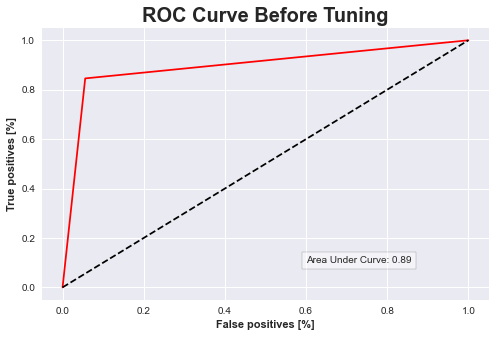

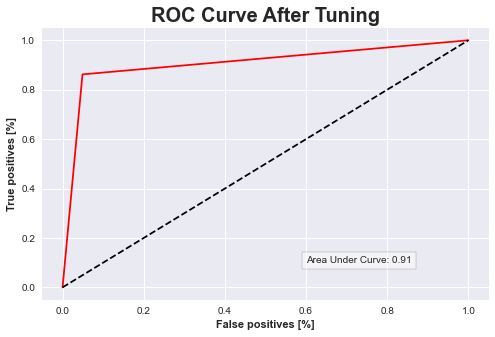

In [ ]:
ROC_plot(y_train, y_pred_before, condition="Before")
ROC_plot(y_train, y_pred, condition="After")

Terlihat bahwa model XGBoostClassifier setelah kita tuning hyperparameternya memiliki nilai ROC AUC yang lebih baik dimana awalnya 0.89 menjadi 0.91. <br>
Selanjutnya, kita akan melihat perbandingan classification reportnya

In [ ]:
print('XGBClassifier Before Tuning')
print(classification_report(y_train, y_pred_before))
print('XGBClassifier After Tuning')
print(classification_report(y_train, y_pred))

XGBClassifier Before Tuning
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3262
           1       0.72      0.85      0.78       674

    accuracy                           0.92      3936
   macro avg       0.85      0.89      0.87      3936
weighted avg       0.93      0.92      0.92      3936

XGBClassifier After Tuning
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3262
           1       0.78      0.86      0.82       674

    accuracy                           0.94      3936
   macro avg       0.88      0.91      0.89      3936
weighted avg       0.94      0.94      0.94      3936



Kembali lagi terlihat bahwa model XGBoostClassifier setelah kita tuning hyperparameternya memiliki classification report yang lebih baik dan cukup signifikan. Oleh karena itu kita akan menggunakan model XGBoostClassifier yang sudah di tuned sebagai model akhir kita.

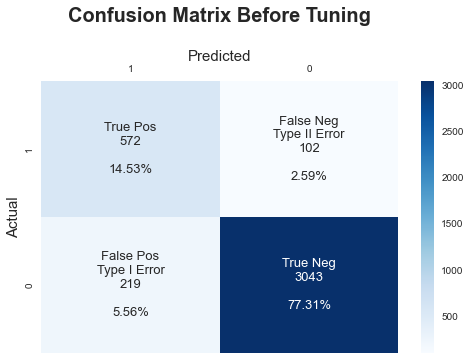

Sensitivity/Recall: 84.87% ---% of "1s" correctly predicted
         Precision: 72.31% ---% of correctly predicted "1s" out of total predicted "1s"
       Specificity: 93.29% ---% of "0s" correctly predicted
          Accuracy: 91.84% ---% of true pos/neg overall


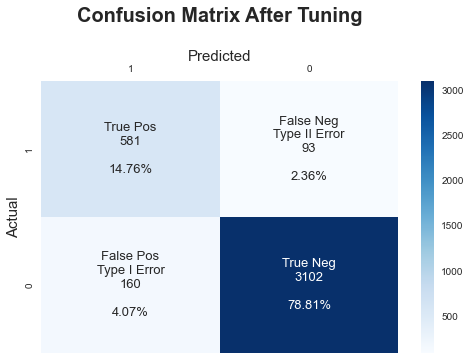

Sensitivity/Recall: 86.20% ---% of "1s" correctly predicted
         Precision: 78.41% ---% of correctly predicted "1s" out of total predicted "1s"
       Specificity: 95.10% ---% of "0s" correctly predicted
          Accuracy: 93.57% ---% of true pos/neg overall


In [ ]:
# Plot confusion matrix.
confusion_plot(y_pred = y_pred_before, y_true = y_train, condition = "Before")
confusion_plot(y_pred = y_pred, y_true = y_train, condition = "After")

Berdasarkan hasil confusion matrixnya, XGBClassifier setelah kita lakukan tuning memberikan pengaruh untuk menurunkan Rate False Negative (Persentase Type II Error: Potensi Kehilangan Customer). Yang awalnya hampir mencapai 3% turun menjadi 2.36%, selain itu juga Rate False Positive (Persentase Type I Error: Kesahalan Biaya Investasi) pun menjadi menurun, dimana yang awalnya lebih dari 5%, setelah model kita tuned ratenya menjadi 4%.

### **Feature Importances**

Pada bagian ini, kita dapat melihat fitur/kolom apa saja yang paling penting untuk model XGBoost kita

In [ ]:
def shap_plot(j, model, S):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [ ]:
X_train_prep = pd.DataFrame(transformer.fit_transform(X_train), columns=transformer.get_feature_names())
y_train_prep = y_train.copy()

In [ ]:
columns = [i for i in X_train_prep.columns]
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

list_shap_values = list()
list_test_sets = list()
list_train_sets = list()

for train_index, test_index in kf.split(X_train_prep, y_train_prep):
    smotenc = SMOTENC(categorical_features=np.array(range(0, 4)), random_state=42)
    X_train_pre, X_test = X_train_prep.iloc[train_index], X_train_prep.iloc[test_index]
    y_train_pre, y_test = y_train_prep.iloc[train_index], y_train_prep.iloc[test_index]
    X_train_pre = pd.DataFrame(X_train_pre, columns=columns)
    X_test = pd.DataFrame(X_test,columns=columns)
    X_train_pre, y_train_pre = smotenc.fit_resample(X_train_pre, y_train_pre)

    #training model
    clf = XGBClassifier(random_state=42, verbosity=0, use_label_encoder=False, colsample_bytree= 0.8, learning_rate= 0.05, max_depth= 14, n_estimators= 400, n_jobs= -1, subsample= 1.0)
    
    clf.fit(X_train_pre, y_train_pre)

    #explaining model
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X_test)
    #for each iteration we save the test_set index and the shap_values
    list_shap_values.append(shap_values)
    list_test_sets.append(test_index)
    list_train_sets.append(train_index)

In [ ]:
#combining results from all iterations
train_set = [i for i in list_train_sets[9]]
test_set = [i for i in list_test_sets[9]]
shap_values = np.array(list_shap_values[9])
   
X_test_shap = pd.DataFrame(X_train_prep.iloc[test_set, :],columns=columns)

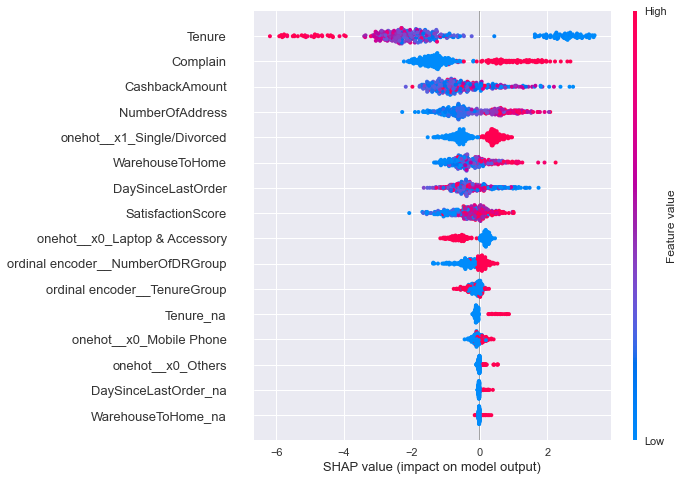

In [ ]:
shap.summary_plot(shap_values, X_test_shap)

In [ ]:
shap_plot(46, clf, X_test)

In [ ]:
shap_plot(212, clf, X_test)

Dari SHAP plot di atas, dapat dilihat feature-feature yang memengaruhi keputusan pelanggan untuk malakukan churn atau tidak yaitu Feature Tenure adalah yang paling penting, kemudian diikuti dengan Complain, CashbackAmount, dan NumberOfAddress, menjadi 4 features teratas yang memengaruhi Customer Churn.

1. Tenure
  - Semakin singkat berlangganan potensi churn semakin meningkat
2. Complain
  - Semakin banyak complain potensi churn semakin meningkat
3. CashbackAmount
  - Semakin sedikit jumlah Cashback yang didapatkan, potensi churn semakin meningkat
4. NumberOfAddress
  - Semakin banyak jumlah alamat yang terdaftar potensi churn semakin meningkat
5. Marital Status Single/Divorced
  - Jika Marital Status coustomer adalah Single/Divorced, potensi churnnya akan semakin besar.
6. WarehouseToHome
 - Semakin jauh jarak dari gudang ke rumah, potensi churn semakin meningkat
7. DaySinceLastOrder
  - Semakin singkat interval pemesanan, potensi churn semakin meningkat
8. SatisfactionScore
  - Semakin tinggi nilai kepuasan, potensi churn semakin meningkat
9. PreferedOrderCat 
- Potensi churn semakin meningkat jika produk yang dipesan pelanggan bukan kategori Laptop & Accesories
10. NumberOfDeviceRegisteredGroup
  - Semakin banyak jumlah device yang terdaftar, potensi churn semakin meningkat (NumberOfDeviceRegistered > 3)
11. TenureGroup
 - Potensi churn semakin besar jika Tenurenya kurang dari 1 tahun
12. Tenure_na, Warehouse_na, DaySinceLastOrder_na
- Potensi churn semakin meningkat jika terdapat missing value pada dataset pelanggan khususnya untuk data terkait Tenure/WarehouseToHome/DaySinceLastOrder

Nanti kedepannya sebenarnya fitur/kolom Tenure_na, WarehouseToHome_na, dan DaySinceLastOrder_na harus dihapus bila model yang kita buat ingin digunakan untuk memprediksi dataset yang dimana fitur Tenure, WarehouseToHome dan DaySinceLastOrder tidak memiliki missing value. Tetapi untuk kali ini asumsi yang kita gunakan adalah adanya missing value pada fitur/kolom tersebut dengan kategori missing value tidak secara acak (Missing Not At Random - MNAR). Sehingga dalam hal ini kita juga menganggap dataset test yang dimiliki pun memuat missing value tersebut, sehingga kita menambahkan varibel baru yang berisi binary missing value flags. 

### **Exporting best model**

In [ ]:
filename = 'xgb_clf.sav'
pickle.dump(xgb_clf.best_estimator_, open(filename, 'wb'))

***
# **Conclusion & Recommendation**

***

In [ ]:
print('XGBClassifier After Tuning')
print(classification_report(y_train, y_pred))

XGBClassifier After Tuning
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3262
           1       0.78      0.86      0.82       674

    accuracy                           0.94      3936
   macro avg       0.88      0.91      0.89      3936
weighted avg       0.94      0.94      0.94      3936



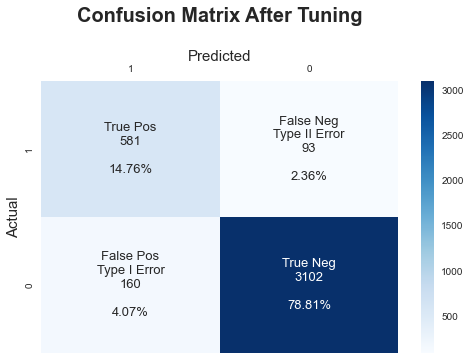

Sensitivity/Recall: 86.20% ---% of "1s" correctly predicted
         Precision: 78.41% ---% of correctly predicted "1s" out of total predicted "1s"
       Specificity: 95.10% ---% of "0s" correctly predicted
          Accuracy: 93.57% ---% of true pos/neg overall


In [ ]:
confusion_plot(y_pred = y_pred, y_true = y_train, condition = "After")

Berdasarkan hasil classification report yang diperoleh dari model kita untuk data training yang telah kita latih dengan tujuan mendapatkan evaluation metrics yang tinggi, kita dapat menyimpulkan bahwa seandainya nanti kita menggunakan model kita untuk mengidentifikasi pelanggan yang berpotensi untuk melakukan churn, maka model kita dapat mengidentifikasi 95% pelanggan yang tidak akan churn untuk tidak kita approach, dan model kita dapat mendapatkan 86% pelanggan yang akan churn dari seluruh pelanggan yang akan churn. (semua ini berdasarkan recallnya)  


Model yang kita gunakan ini memiliki ketepatan prediksi customer churn sebesar 78% (precision), jadi setiap model kita memprediksi bahwa seseorang pelanggan akan melakukan churn, maka kemungkinan prediksinya benar sebesar 78%. Maka masih akan ada pelanggan yang sebenarnya tidak akan churn tetapi diprediksi sebagai pelanggan yang churn yaitu sekitar 4% dari keseluruhan pelanggan yang tidak akan churn.

Penelitian telah menemukan bahwa 5 sampai 6 kali lebih mahal untuk mendapatkan pelanggan baru daripada mempertahankan pelanggan yang sudah ada. Bila seandainya biaya untuk mempertahankan pelanggan lama sebesar $10 (berdasarkan sumber dari https://www.shopify.co.id/blog/customer-acquisition-cost) dan potensi kerugian untuk customer yang churn adalah 5x biaya mempertahankan pelanggan lama ($50), dan andaikan jumlah pelanggan yang kita miliki 3936 pelanggan (mengacu pada plot confusion metrics dimana seandainya 674 pelanggan melakukan churn, dan 3262 pelanggan tidak melakukan churn), maka hitungannya kurang lebih seperti di bawah ini:

Tanpa model (semua pelanggan kita check dan kita berikan penawaran)
- Total Biaya = 3936 x $10 = $39,360
- Total Pelanggan yang melakukan churn yang kita temukan = 674 orang (semua kita berikan penawaran)
- Total pelanggan yang melakukan churn tetapi tidak ditemukan = 0 
- Total Pelanggan yang tidak melakukan churn yang kita temukan = 3262 orang (semua kita berikan penawaran)
- Total pelanggan yang tidak melakukan churn tetapi tidak ditemukan = 0 
- Biaya yang terbuang = 3262 x $10 = $32,620
- Jumlah penghematan = $0

Dengan Model (hanya pelanggan yang diprediksi oleh model berpotensi melakukan churn yang kita check dan tawarkan) :
- Total Biaya = [(0.86 x 674) + (0.4 x 3262)] x $10) = $7,410
- Total Pelanggan yang melakukan churn yang kita temukan = 581 orang (78% yang benar dari total prediksi pelanggan yang churn)
- Total pelanggan yang melakukan churn tetapi tidak berhasil ditemukan = 93 orang (2.36%)
- Biaya yang terbuang = [0.4 x 3262] x $10 = $160
- Potensi kerugian kehilangan customer = 93 x $50 = $4,650
- Jumlah penghematan = ([3102 x $10] - [93 x $50]) = $31,020 - $4,650 = $26,370 (yang dihitung hanya pelanggan yang memang tidak melakukan churn dan dikurangi dengan kerugian akibat kehilangan customer) 

Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model kita, maka perusahaan tersebut akan menghemat biaya yang cukup besar tanpa mengorbankan terlalu banyak jumlah pelanggan yang berpotensi melakukan churn.

#### **Recommendation**

Hal-hal yang dapat kita lakukan untuk mengurangi masalah customer churn jika kita perhatikan pada faktor-faktor variabel utama penyebab customer churn, yaitu :

1. Kita dapat memberikan penawaran khusus (Promo Cashback paket produk) kepada pelanggan yang memiliki masa tenure 0 - 1 bulan untuk mencegah potensi churn terhadap pelanggan baru.
2. Perlu adanya perbaikan fungsi aplikasi yang digunakan eCommerce Company ini maupun feedback pelayanan (service) yang lebih responsif terhadap komplain dari pelanggan/user, untuk mencegah pelanggan akan churn.
3. Kita dapat memberikan notifikasi pengingat (reminder) yang bisa digabungkan dengan program insentif untuk pelanggan yang telah melakukan pemesanan agar akun pelanggan kembali aktif dan tidak churn. 
4. Kita dapat memberikan penawaran berupa pengurangan biaya ongkos kirim kepada pelanggan yang memiliki jarak yang jauh dari gudang, bisa dengan melakukan kerja sama dengan pihak jasa pengantar (kurir) untuk meringankan cost dari perusahaan.
5. Pelanggan baru yang memberikan nilai Satisfaction Score 5 dapat kita berikan notifikasi email untuk aktif kembali dengan isi email berupa visual grafis marketing ajakan untuk kembali aktif menggunakan aplikasi eCommerce Company ini.

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :
- Membuat kebijakan baru yang mendorong setiap pelanggan untuk mengisi dengan lengkap semua data yang diperlukan kedepannya, terkait informasi Tenure, WarehouseToHome, serta DaySinceLastOrder, karena pada dasarnya setiap pelanggan yang telah melakukan order produk pasti memiliki informasi-informasi tersebut. 
- Menambahkan fitur2 atau kolom2 baru yang kemungkinan bisa mempengaruhi customer churn, seperti durasi pengiriman produk, dan biaya pengiriman produk dari warehouse ke alamat pelanggan, dll.
- Mencoba algorithm ML yang lain dan juga mencoba hyperparameter tuning kembali, dan menggunakan teknik oversampling yang berbeda selain SMONTENC, seperti Random Over Sampling, dll. 
- Meninjau dan menganalisa lebih detail data-data yang model kita masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana.